In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/diogo-costa-silva/datasets/main/video-game-sales.csv")

# Display the first few rows of the dataset
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Here's a brief overview of what we have:

- The Rank of the game based on overall sales.
- The Name of the game.
- The Platform it was released on.
- The Year of release.
- The Genre of the game.
- The Publisher of the game.
- Sales data from different regions (NA_Sales, EU_Sales, JP_Sales, Other_Sales) and Global_Sales.


The approach to analyze this dataset. Here are some potential steps and analyses we can consider:

1. Data Cleaning and Exploration:

- Handle any missing values.
- Explore data types and adjust if necessary.
- Generate descriptive statistics to understand data distribution.


2. Data Visualization:

- Visualize top-selling games globally.
- Visualize sales by platform.
- Visualize sales by genre.
- Visualize sales trends over the years.
- Compare sales across different regions.


3. Insight Generation:

- Identify the most popular platforms over time.
- Identify the most popular genres over time.
- Determine the impact of publishers on sales.
- Explore any correlations between regions (e.g., do games that sell well in NA also sell well in EU?).

4. Predictive Analysis (if desired):

- Predict future sales based on historical data.
- Predict the success of a game based on its platform, genre, and publisher.


To begin, let's start with the first step: <b>Data Cleaning and Exploration</b>. We'll check for missing values and data types first.

In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types of the columns
data_types = df.dtypes

missing_values, data_types


(Rank              0
 Name              0
 Platform          0
 Year            271
 Genre             0
 Publisher        58
 NA_Sales          0
 EU_Sales          0
 JP_Sales          0
 Other_Sales       0
 Global_Sales      0
 dtype: int64,
 Rank              int64
 Name             object
 Platform         object
 Year            float64
 Genre            object
 Publisher        object
 NA_Sales        float64
 EU_Sales        float64
 JP_Sales        float64
 Other_Sales     float64
 Global_Sales    float64
 dtype: object)

Here's what we've observed:

1. Missing Values:

- The `Year` column has 271 missing values.
- The `Publisher` column has 58 missing values.

2. Data Types:

- Most columns have the expected data types.
- The `Year` column is of type `float64`, which might be better represented as an `int` <b>after handling missing values </b>.

Next steps:

- For the `Year` column, one way to handle missing values is to remove those rows, especially if the dataset is large and the missing values constitute a small percentage. Alternatively, if there's a mode (most frequent value) that's significantly dominant, we could fill in the missing values with this mode.

- For the Publisher column, we could either drop rows with missing values or fill them with a placeholder like "Unknown".

- After handling missing values in the Year column, we can convert it to an integer type for better representation.

Let's start by examining the distribution of the `Year` column to decide how to handle its missing values.

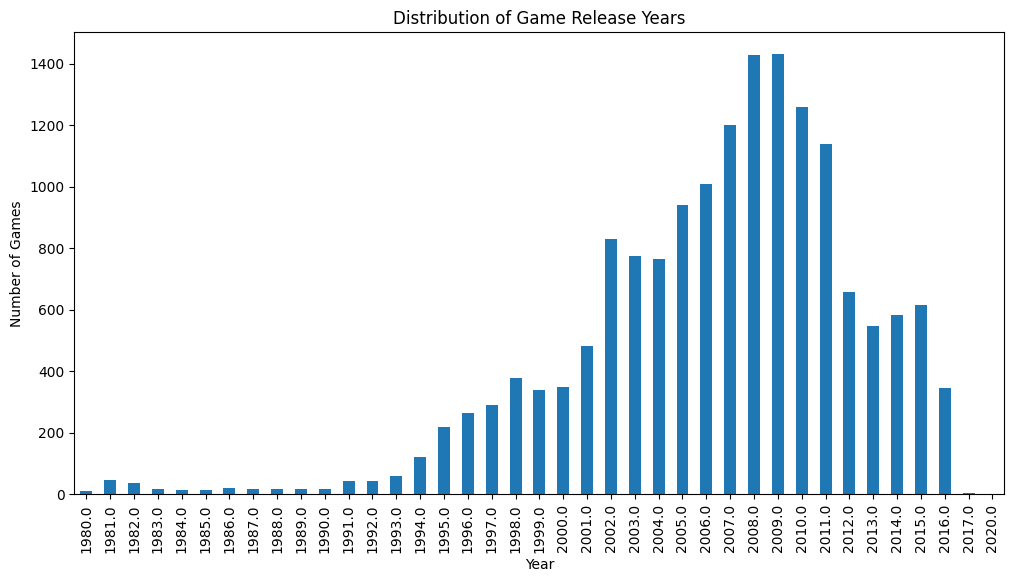

In [4]:
import matplotlib.pyplot as plt

# Plot distribution of the Year column
plt.figure(figsize=(12, 6))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Game Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.show()


- The distribution of game release years indicates a general increase in the number of games released each year, with some peaks around the mid-2000s and a decline in recent years (this decline could be due to incomplete data for the most recent years or other factors).

- Given this distribution, one approach for handling the missing values in the Year column would be to fill them with the mode (most frequent value). Another approach would be to simply drop these rows, especially if we assume that the year is a crucial factor in our analysis.

- For the Publisher column, we can fill the missing values with "Unknown" or drop those rows.

Let's move forward with the following strategy:

- Fill missing values in the Year column with the mode.
- Fill missing values in the Publisher column with "Unknown".
- Convert the Year column to an integer data type.

In [5]:
# Fill missing values in the Year column with the mode
df['Year'].fillna(df['Year'].mode()[0], inplace=True)

# Fill missing values in the Publisher column with "Unknown"
df['Publisher'].fillna("Unknown", inplace=True)

# Convert the Year column to integer type
df['Year'] = df['Year'].astype(int)

# Verify that there are no missing values left
missing_values_updated = df.isnull().sum()

missing_values_updated


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Great! We've successfully handled the missing values and there are none left in the dataset.

With the data cleaned, we can move on to the next phase: 

<a id='data-viz'></a>
# <p style="background-color:IndianRed;font-family:Verdana;font-size:135%;color:lightgray;text-align:center;border-radius:50px 5px;"> Data Visualization</p>


Here's a proposed sequence of visualizations:

1. Top-selling games globally: Display the top 10 games with the highest global sales.
2. Sales by platform: Visualize the total sales across different platforms.
3. Sales by genre: Visualize the total sales across different genres.
4. Sales trends over the years: Analyze how global sales have evolved over time.
5. Comparison of sales across different regions: A stacked bar or grouped bar chart to compare sales in North America, Europe, Japan, and other regions.

Let's start with the first visualization: <b>Top-selling games globally</b>.



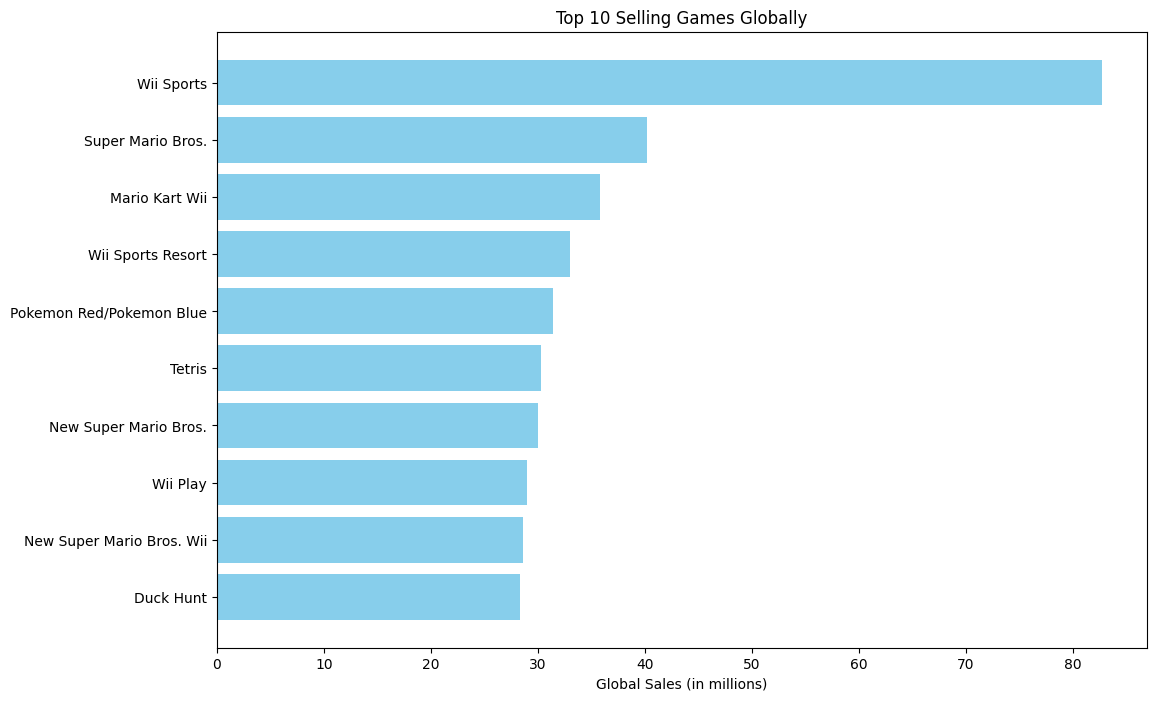

In [6]:
# Display top 10 games with highest global sales
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10_games['Name'], top_10_games['Global_Sales'], color='skyblue')
plt.xlabel('Global Sales (in millions)')
plt.title('Top 10 Selling Games Globally')
plt.gca().invert_yaxis()  # Invert y-axis to have the top game at the top
plt.show()


Here are the top 10 best-selling video games globally:

- "Wii Sports" tops the list with a significant margin, followed by classics like "Super Mario Bros." and "Mario Kart Wii".

Next, let's visualize the <b>total sales across different platforms</b>. This will give us an insight into the most lucrative platforms in terms of video game sales.

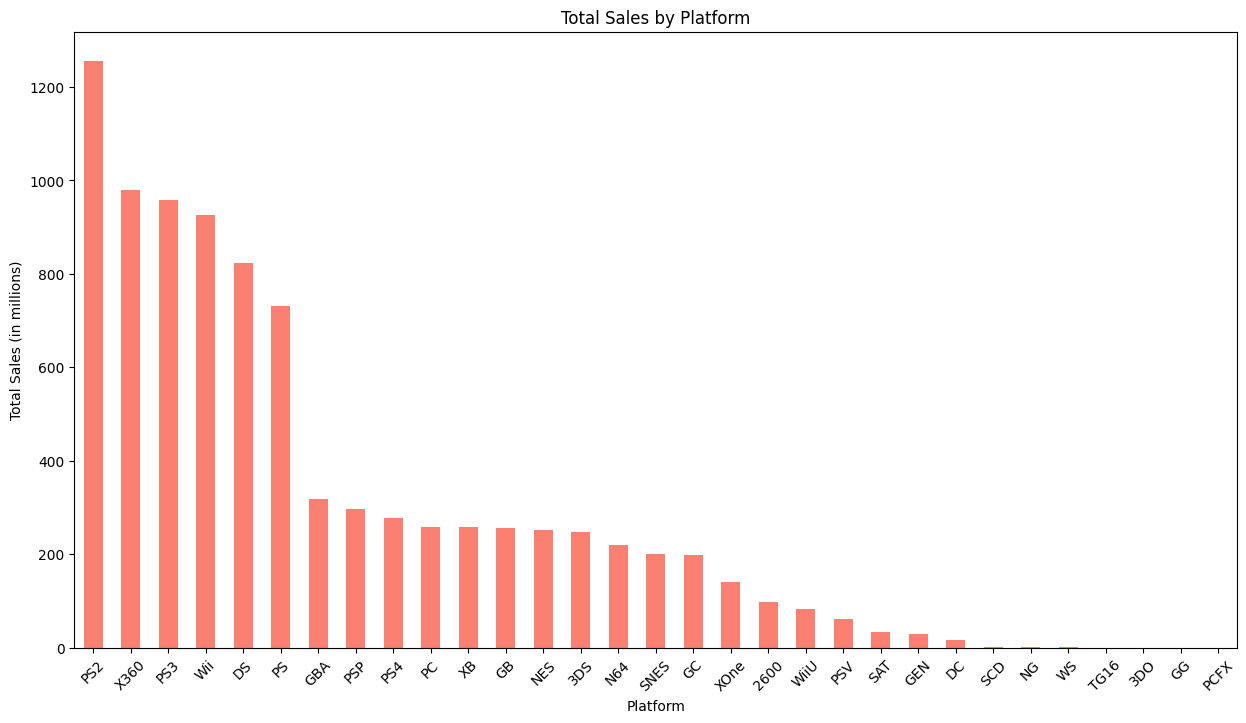

In [7]:
# Aggregate sales by platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
platform_sales.plot(kind='bar', color='salmon')
plt.title('Total Sales by Platform')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.show()


The visualization showcases the total sales across different platforms:

- Platforms like PS2, X360, PS3, Wii, and DS dominate the chart in terms of global sales.
- It's also noticeable that many older consoles (e.g., NES, GB) still have high sales figures, showcasing their historical importance and success.

Next, let's explore the <b>sales distribution across different genres</b> to understand which types of games have been the most popular.

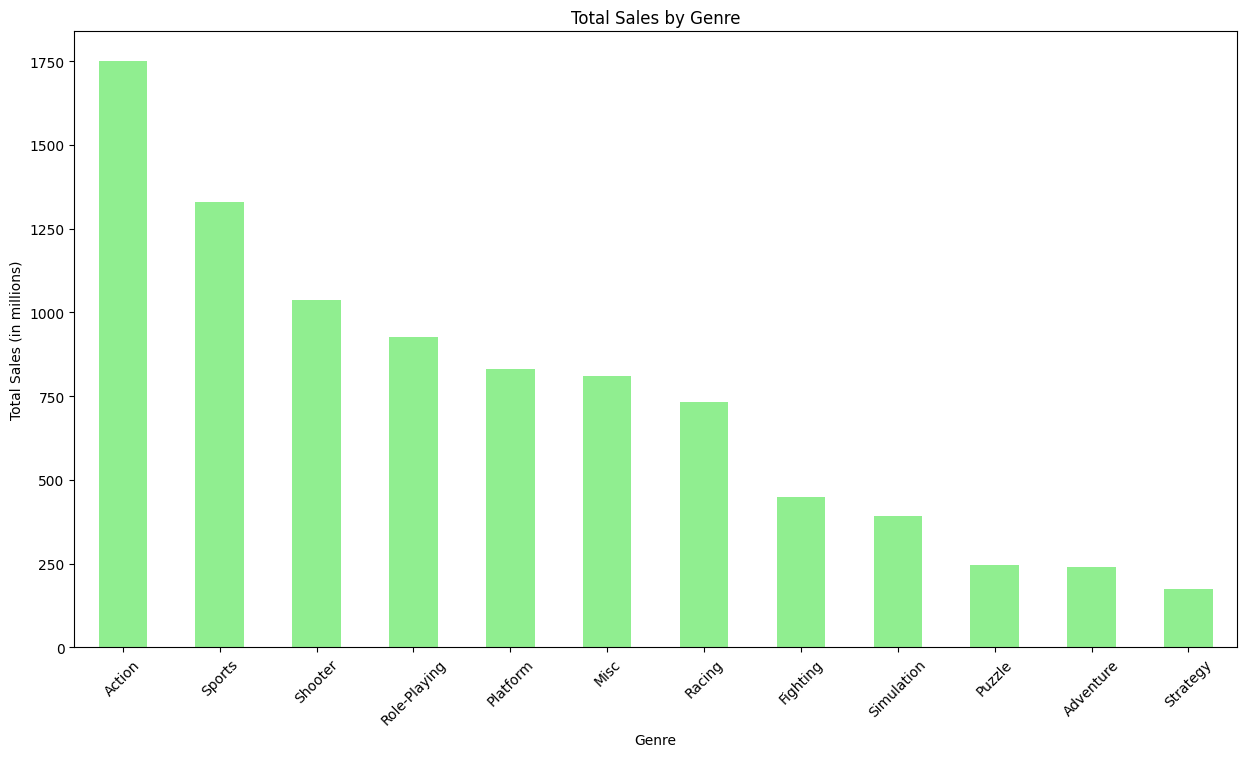

In [8]:
# Aggregate sales by genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
genre_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Genre')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


The visualization illustrates the total sales across different genres:

- "Action" games lead the chart, followed closely by "Sports", "Shooter", and "Role-Playing" games.
- Genres like "Puzzle" and "Strategy" have comparatively lower sales, indicating a smaller but dedicated audience.

Now, let's examine the <b>sales trends over the years</b>. This will provide insights into the evolution of the gaming industry and the popularity of video games over time.

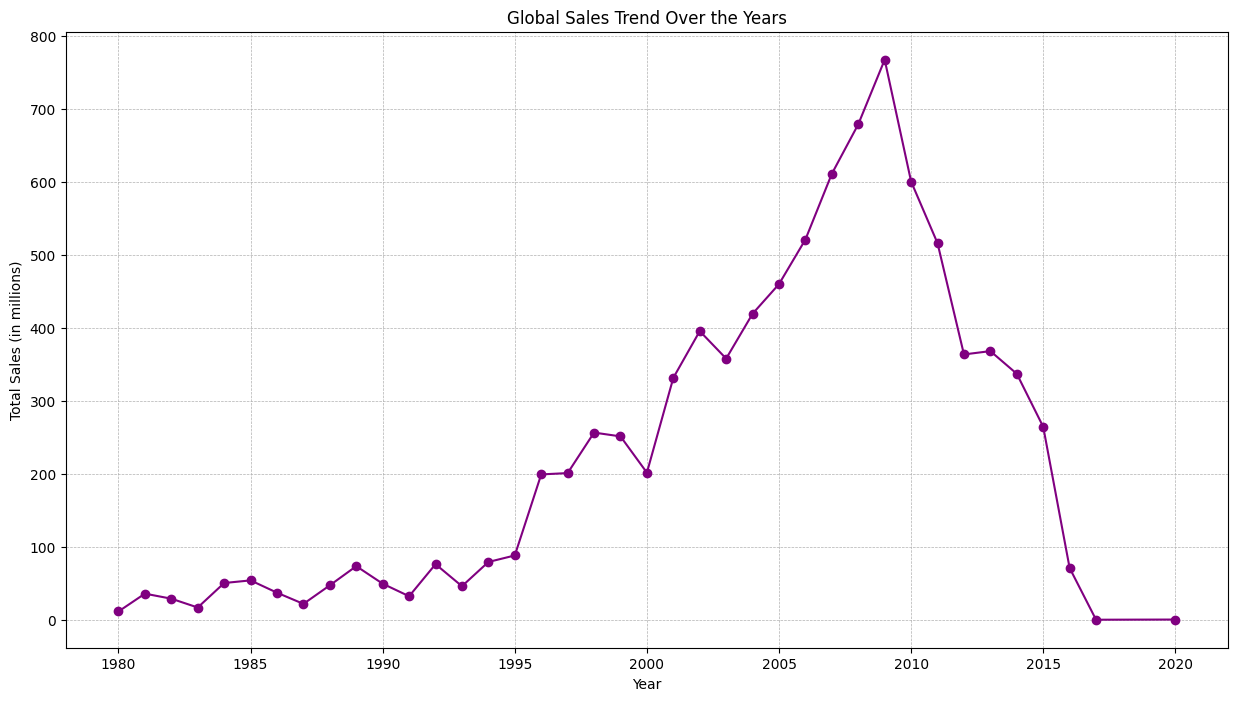

In [9]:
# Aggregate sales by year
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(15, 8))
yearly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Global Sales Trend Over the Years')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The visualization shows the trend of global video game sales over the years:

- There is a noticeable increase in sales from the early 1990s, reaching a peak around 2008-2009.
- Post 2009, there is a decline in global sales, which might be due to various factors, such as the rise of mobile gaming, digital game distribution, or other industry shifts.

Lastly, let's compare <b>sales across different regions</b> to understand regional preferences and market dynamics. We'll use a <b>stacked bar chart</b> for this visualization.

<Figure size 1500x1000 with 0 Axes>

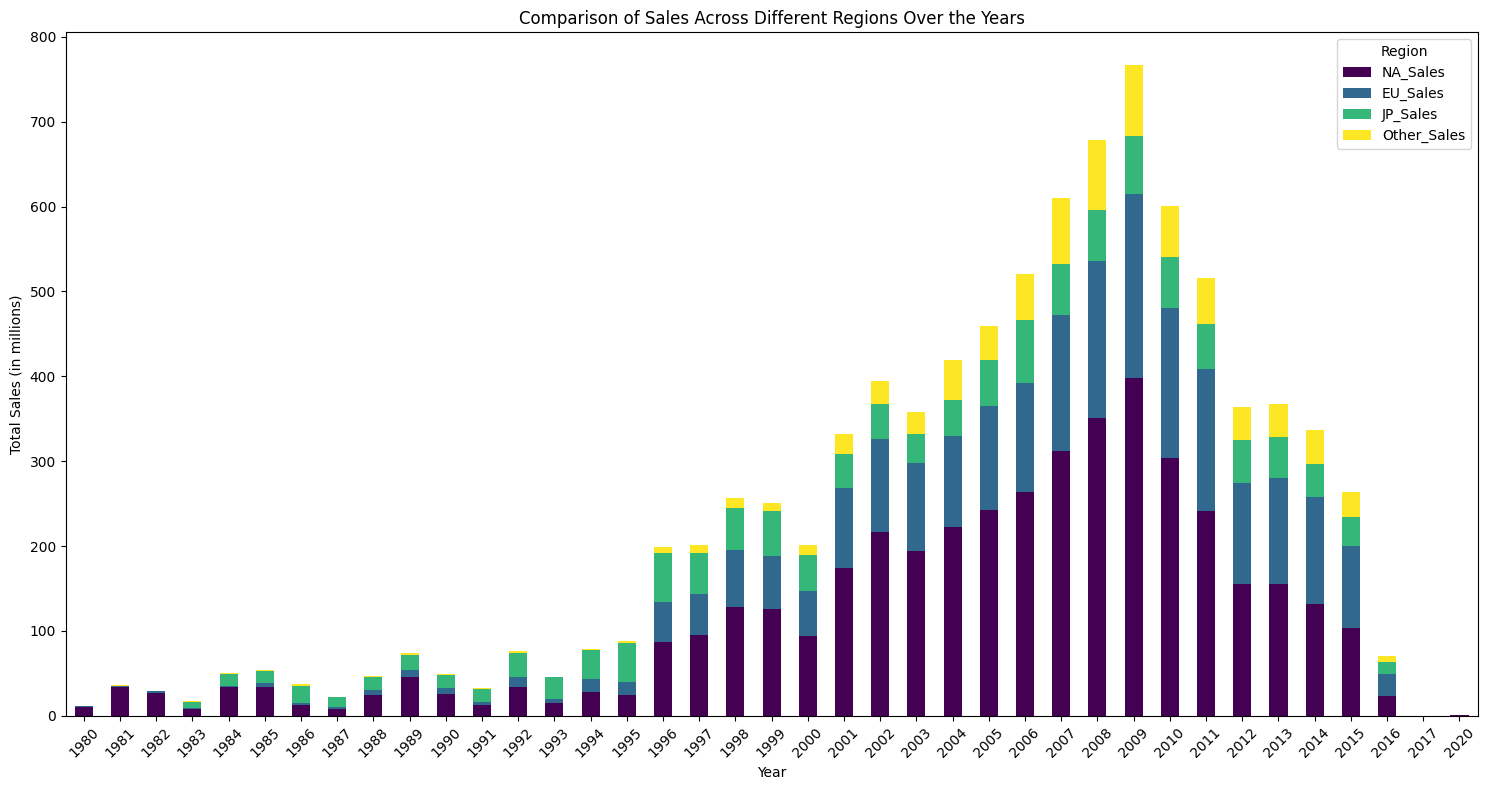

In [10]:
# Aggregate sales by year for each region
region_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plotting
plt.figure(figsize=(15, 10))
region_sales.plot(kind='bar', stacked=True, figsize=(15, 8), colormap="viridis")
plt.title('Comparison of Sales Across Different Regions Over the Years')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Year')
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The stacked bar chart provides a comparison of video game sales across different regions over the years:

- North America (NA) has consistently been a major market for video games, contributing a significant portion of global sales.
- Europe (EU) and Japan (JP) also have substantial sales, but their proportions vary. For instance, Japan had higher sales in the earlier years, while Europe's sales seem more consistent and even surpassing North America in some of the recent years.
- Other regions contribute a smaller portion, but their contribution has been increasing over time, indicating the growth of the gaming market in other parts of the world.


With these visualizations, we've gained insights into <b>global sales trends, platform popularity, genre preferences</b>, and <b>regional market dynamics</b>.

### Sales by Region for Top Genres:
We'll start by visualizing the sales of the top genres across different regions. This will help us understand the genre preference

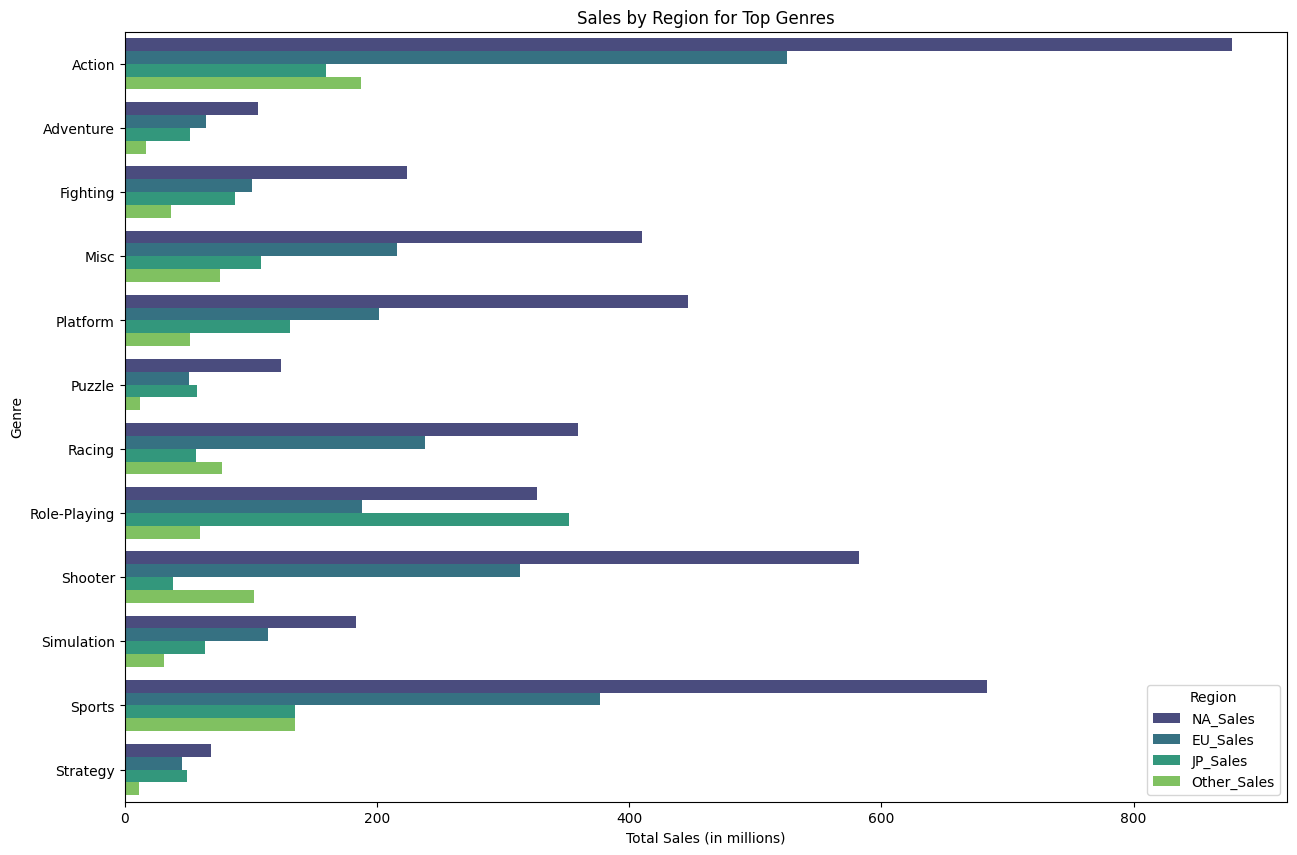

In [28]:
import seaborn as sns

# Calculate total sales by genre for each region
genre_sales_by_region = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Transform data for visualization
genre_sales_melted = genre_sales_by_region.reset_index().melt(id_vars='Genre', 
                                                              value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                                              var_name='Region', value_name='Sales')

plt.figure(figsize=(15, 10))
sns.barplot(x='Sales', y='Genre', hue='Region', data=genre_sales_melted, palette='viridis')
plt.title('Sales by Region for Top Genres')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Genre')
plt.show()


The enhanced visualization provides insights into the sales of the top genres across different regions:

- North America (NA) and Europe (EU) have similar tastes, with "Action", "Sports", and "Shooter" genres leading in sales.
- Japan (JP) shows a distinct preference for the "Role-Playing" genre, which significantly outsells other genres in that region.
- For other regions grouped under Other_Sales, the "Action" genre seems to be the most popular.

### 2. Yearly Sales Trends of Top Platforms:
Understanding the yearly sales trends of the top platforms will give us insights into their lifecycles and periods of dominance.

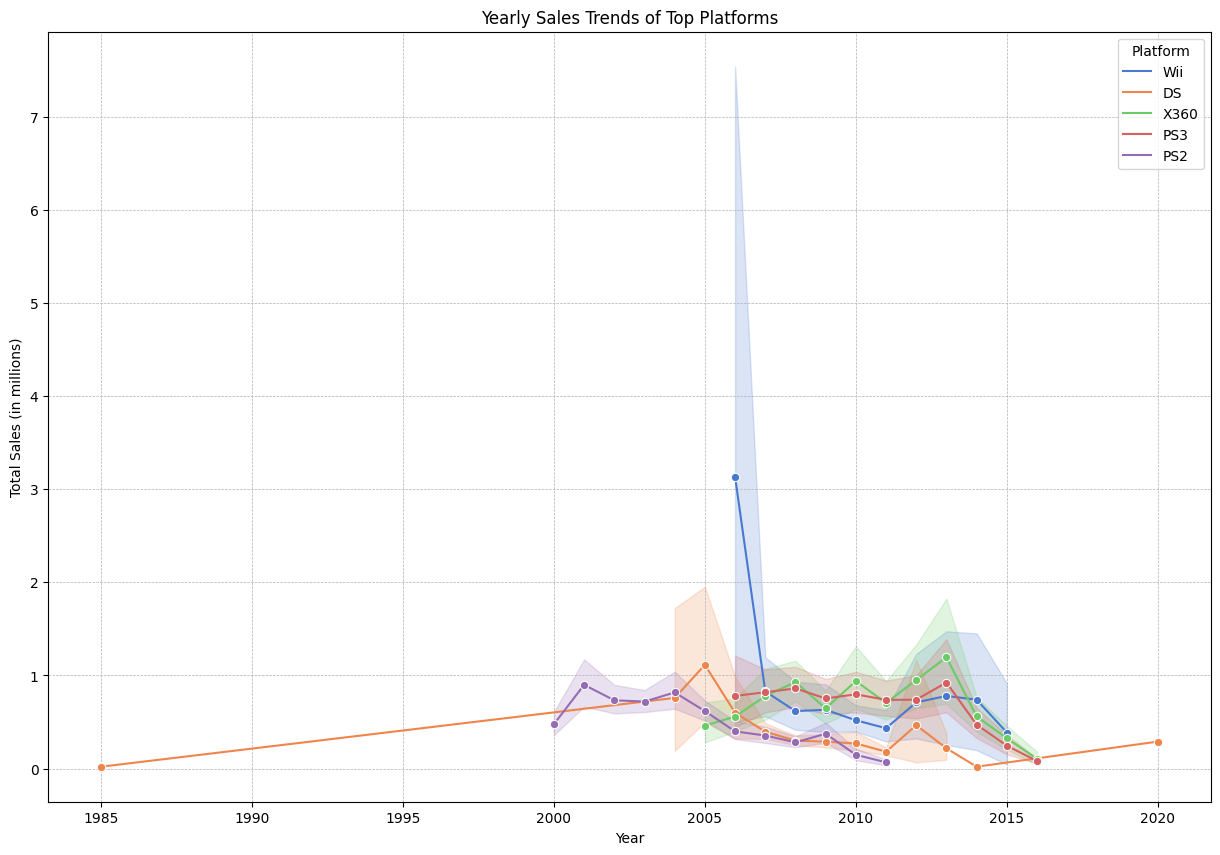

In [29]:
# Filter top platforms based on total sales
top_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter dataset for these platforms
platform_sales = df[df['Platform'].isin(top_platforms)]

plt.figure(figsize=(15, 10))
sns.lineplot(x='Year', y='Global_Sales', hue='Platform', data=platform_sales, marker='o', palette='muted')
plt.title('Yearly Sales Trends of Top Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The visualization highlights the yearly sales trends of the top platforms:

- X360: This platform experienced a rise in sales from its introduction around 2005, peaked around 2011, and then began to decline.
- PS3: The PlayStation 3 saw a similar trend to the X360, with a rise post its launch, a peak around 2011, and a subsequent decline.
- Wii: The Wii had a sharp rise in sales around 2006-2007 and maintained high sales until 2010, after which there was a decline.
- DS: The DS platform experienced a steady rise in the mid-2000s, peaked around 2008, and then sales started to decrease.
- PS2: The PlayStation 2 had strong sales in the early 2000s, peaking around 2004.

Observing these trends, it's evident that platforms have lifecycles with periods of growth, peak performance, and eventual decline as newer platforms are introduced.

### 3. Distribution of Global Sales:
Understanding the distribution of sales will provide insights into the success rates of games and how sales are spread across the industry.

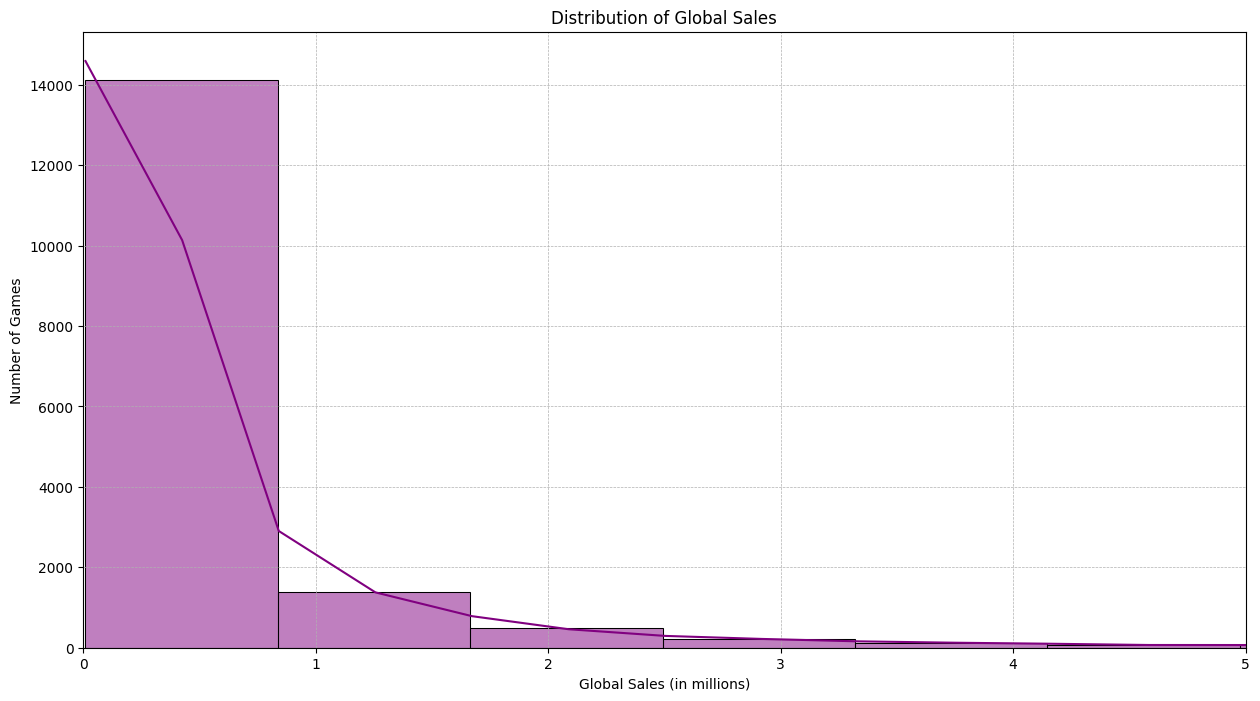

In [30]:
plt.figure(figsize=(15, 8))
sns.histplot(df['Global_Sales'], bins=100, kde=True, color='purple')
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Number of Games')
plt.xlim(0, 5)  # Limiting x-axis to view distribution for games with sales under 5 million
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The histogram illustrates the distribution of global sales:

- A large number of games have sales under 1 million copies. This peak represents the majority of games in the industry.
- As sales figures increase, fewer games achieve those numbers, leading to the declining pattern observed.
- Very few games manage to surpass the 2 million sales mark, and even fewer go beyond 3 million.

This distribution highlights the competitive nature of the gaming industry. While a few titles achieve blockbuster status and garner high sales, many games see modest sales figures.

### 4. The Relationship Between North American and European Sales:
Given the correlation we observed earlier between North American and European sales, it would be interesting to visualize this relationship.

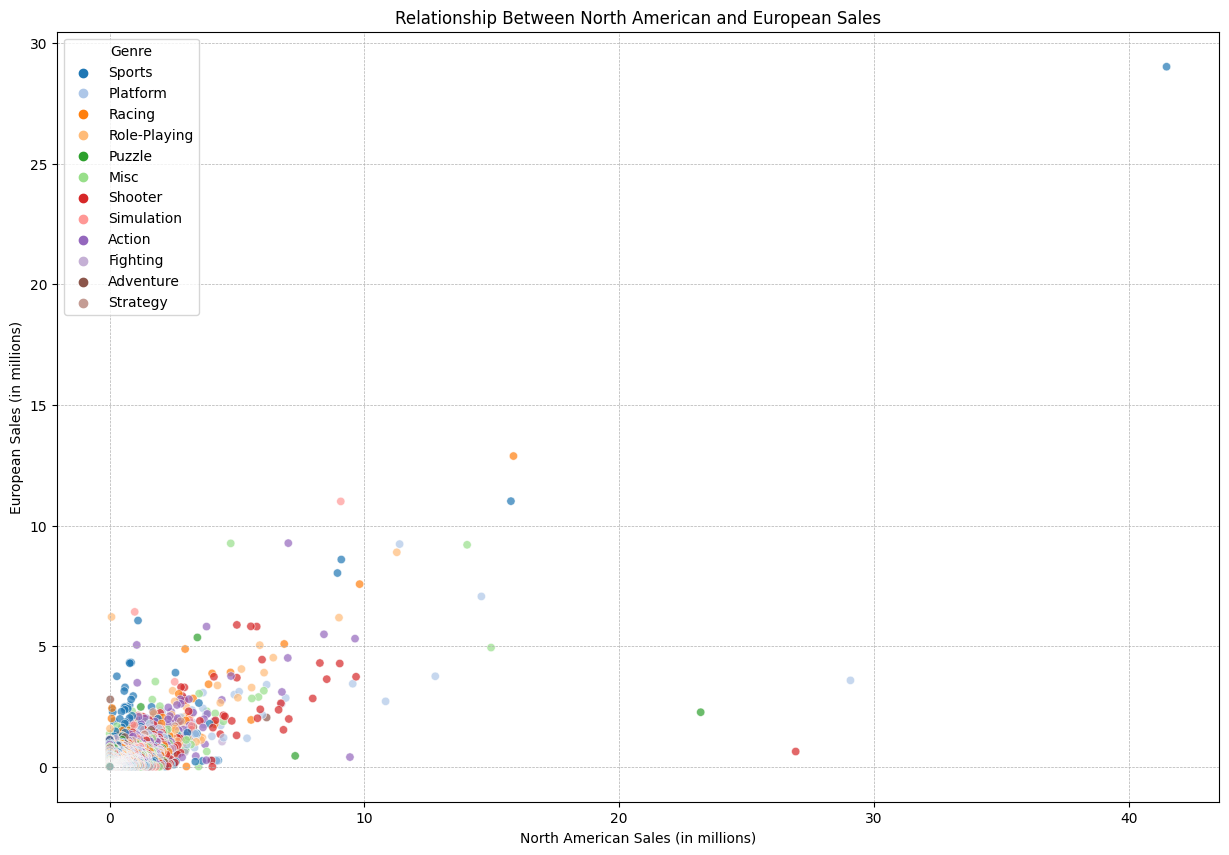

In [31]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=df, hue='Genre', palette='tab20', alpha=0.7)
plt.title('Relationship Between North American and European Sales')
plt.xlabel('North American Sales (in millions)')
plt.ylabel('European Sales (in millions)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The scatter plot elucidates the relationship between North American and European sales:

- A strong positive correlation is evident, with many games clustering along a diagonal line, indicating that games which sell well in North America also tend to sell well in Europe, and vice versa.
- Different genres are represented by various colors, showing a mix across the sales spectrum. For instance, many "Action" and "Sports" games are spread across the plot, given their popularity in both regions.
- Games near the top right of the plot represent titles that have achieved high sales in both regions, reflecting blockbuster status.


<a id='data-viz'></a>
# <p style="background-color:IndianRed;font-family:Verdana;font-size:135%;color:lightgray;text-align:center;border-radius:50px 5px;"> Insight Generation</p>

For the next phase, <b>Insight Generation</b>, we can delve deeper into specific areas or questions of interest. For instance:

1. Platform Evolution:

- Which platforms have had the longest lifespan in terms of game releases?
- Are there platforms that had a sudden surge and decline in game releases?

2. Publisher Analysis:

- Which publishers have the most number of games in the top 100 global sales?
- How have the top publishers' sales trends varied over time?

3. Genre Popularity:

- Which genres are most popular in specific regions? For example, are Role-Playing games more popular in Japan compared to North America?
- Has the popularity of genres changed over time? For instance, were sports games more popular in the 2000s compared to the 2010s?

4. Game Lifespan:

- Are there games that continue to sell well years after their release? What are these "evergreen" games?
- How do sales figures typically drop off after the initial release year for most games?

5. Yearly Leaders:

- Which game was the best seller each year?
- Which platform dominated sales each year?

6. Sales Correlations:

- Are sales figures in Europe correlated with sales figures in North America? Does a hit in one region mean it will likely be a hit in another?
- Do certain genres correlate with higher sales in certain regions?

7. Impact of Sequels:

- How do sequels perform compared to their predecessors in terms of sales?
- Are there franchises that consistently improve in sales with each new release?

8. Retro Gaming:

- Are older games (e.g., from the 1980s and 1990s) still seeing significant sales in recent years?

9. Market Saturation:

- In years where there were more game releases, did the total sales increase proportionally, or was there a dilution in sales per game?

10. Economic Factors:

- Were there global or regional economic events (like recessions) that significantly impacted game sales in certain years?


11. Platform Transition:
- How quickly do sales decline for older platforms when a newer version is released?
12. Publisher Diversity:
- Which publishers have the most diverse portfolio in terms of genres?
13. Regional Exclusivity:
- Are there games that sell particularly well in one region but not in others?
14. Genre Lifespan:
- How have different genres evolved in popularity over time?
15. Top Games Analysis:
- What are the common characteristics (if any) among the top 10 selling games?
16. Publisher Consistency:
- Which publishers have consistently high sales over the years?
17. Game Ratings (if data was available):
- How do game ratings correlate with sales?
8. Price Point Analysis (if data was available):
- How does the price point of a game correlate with its sales?
19. Mobile vs. Console vs. PC:
- How have sales trends differed across these platforms over the years?
20. Impact of Digital Distribution (if data was available):
- With the rise of digital distribution platforms like Steam, Epic Games Store, etc., how has the sales landscape changed for PC games?

## 1. Platform Evolution

#### 1.1. Which platforms have had the longest lifespan in terms of game releases?

In [11]:
# Calculate the first and last year of game release for each platform again
platform_lifespan = df.groupby('Platform')['Year'].agg(['min', 'max'])
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

# Sort platforms by lifespan
platform_lifespan_sorted = platform_lifespan.sort_values(by='lifespan', ascending=False)

platform_lifespan_sorted.head(10)

,min,max,lifespan
Platform,,,
DS,1985,2020,35
PC,1985,2016,31
2600,1980,2009,29
GB,1988,2009,21
PS,1994,2009,15
N64,1996,2009,13
X360,2005,2016,11
NES,1983,1994,11
PS2,2000,2011,11



- DS has the longest lifespan of 35 years, from 1985 to 2020.
- PC follows with a lifespan of 31 years, from 1985 to 2016.
- 2600 has a lifespan of 29 years, from 1980 to 2009.
- Other platforms like GB, PS, N64, and X360 have lifespans ranging from 11 to 21 years.

#### 1.2. Are there platforms that had a sudden surge and decline in game releases?

We'll visualize the number of game releases per year for some of the major platforms to answer this.

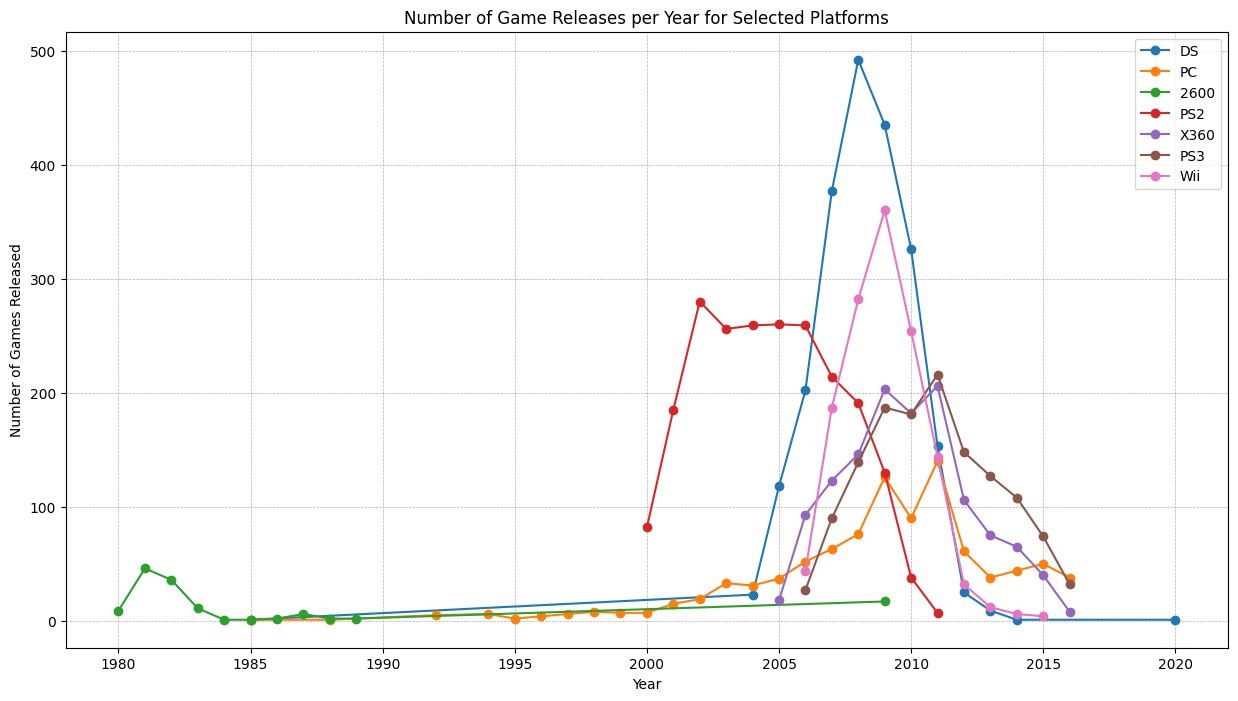

In [12]:
# Platforms of interest for analysis
platforms_of_interest = ['DS', 'PC', '2600', 'PS2', 'X360', 'PS3', 'Wii']

# Plotting the number of game releases per year for these platforms
plt.figure(figsize=(15, 8))

for platform in platforms_of_interest:
    platform_data = df[df['Platform'] == platform].groupby('Year').size()
    plt.plot(platform_data.index, platform_data.values, label=platform, marker='o')

plt.title('Number of Game Releases per Year for Selected Platforms')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The graph illustrates the number of game releases per year for selected platforms:

- DS: While it has the longest lifespan, there's a clear peak around 2008-2010 with a decline afterward.
- PC: It has a fairly consistent number of releases over time, but with some fluctuations.
- 2600: This platform saw most of its releases in the early years, with very few releases after the mid-1980s.
- PS2, X360, PS3, Wii: All these platforms show a bell-shaped curve, indicating a rise and fall in the number of game releases over their lifespan.

## 2. Publisher Analysis:

#### 2.1. Which publishers have the most number of games in the top 100 global sales?

In [13]:
# Filter top 100 games by global sales
top_100_games = df.sort_values(by='Global_Sales', ascending=False).head(100)

# Count the number of games by publisher
top_publishers = top_100_games['Publisher'].value_counts()

top_publishers

Nintendo                       52
Activision                     14
Take-Two Interactive            9
Sony Computer Entertainment     8
Microsoft Game Studios          6
Electronic Arts                 5
Ubisoft                         2
Bethesda Softworks              1
Sega                            1
SquareSoft                      1
Atari                           1
Name: Publisher, dtype: int64

For the top 100 best-selling games globally:

- Nintendo dominates the list with 52 games.
- Activision follows with 14 games.
- Take-Two Interactive has 9 games in the top 100.
- Other notable publishers include Sony Computer Entertainment with 8 games, Microsoft Game Studios with 6 games, and Electronic Arts with 5 games.

#### 2.2. How have the top publishers' sales trends varied over time?
We'll visualize the sales trends over the years for some of the top publishers.




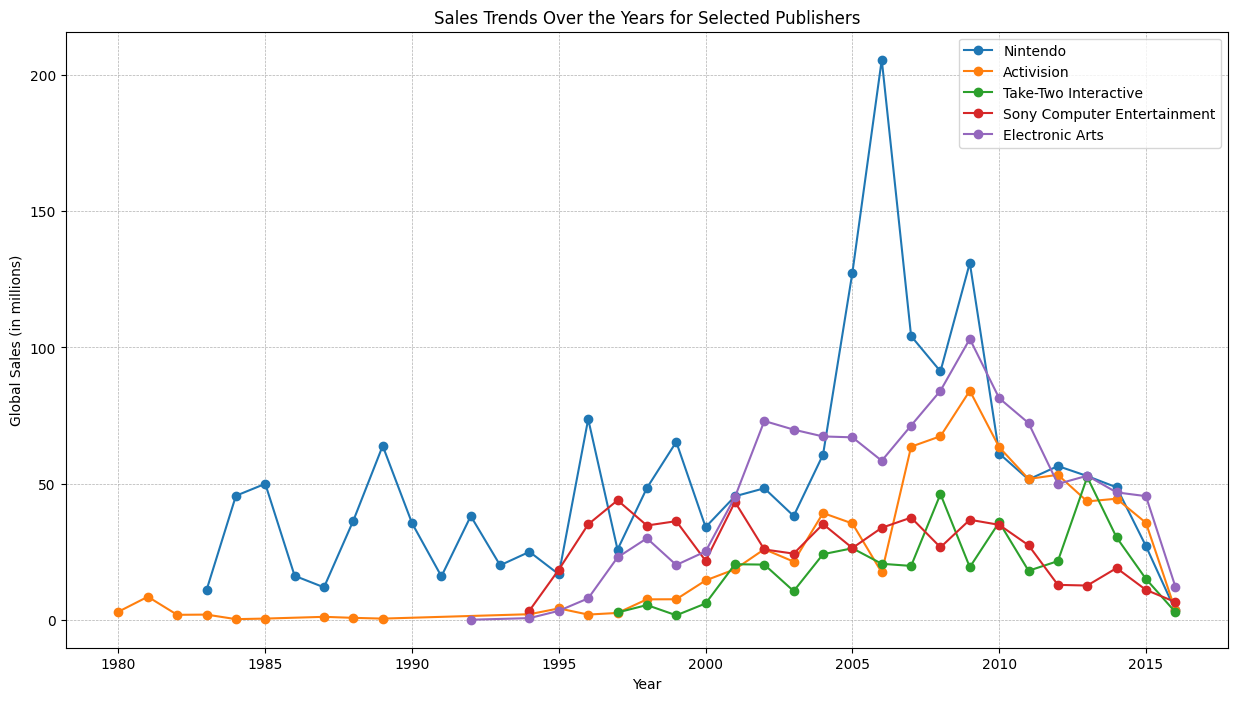

In [14]:
# Publishers of interest for analysis
publishers_of_interest = ['Nintendo', 'Activision', 'Take-Two Interactive', 'Sony Computer Entertainment', 'Electronic Arts']

# Plotting the sales trends for these publishers
plt.figure(figsize=(15, 8))

for publisher in publishers_of_interest:
    publisher_data = df[df['Publisher'] == publisher].groupby('Year')['Global_Sales'].sum()
    plt.plot(publisher_data.index, publisher_data.values, label=publisher, marker='o')

plt.title('Sales Trends Over the Years for Selected Publishers')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The graph shows the sales trends over the years for selected publishers:

- Nintendo: Dominates sales, especially in the late 2000s, aligning with the success of consoles like the Wii and DS, and their associated game titles.
- Activision: Sees a significant surge in sales around the late 2000s and early 2010s, likely tied to the success of franchises like "Call of Duty".
- Take-Two Interactive: Has spikes in sales, potentially linked to the release of major titles like "Grand Theft Auto".
- Sony Computer Entertainment: Has consistent sales over the years with some peaks, reflecting the success of PlayStation consoles and exclusive games.
- Electronic Arts: Maintains a consistent sales trend, with a slight increase in the 2010s, reflecting their diverse game portfolio.


## 3. Genre Popularity

#### 3.1. Which genres are most popular in specific regions?

Let's begin by exploring the popularity of genres in North America.

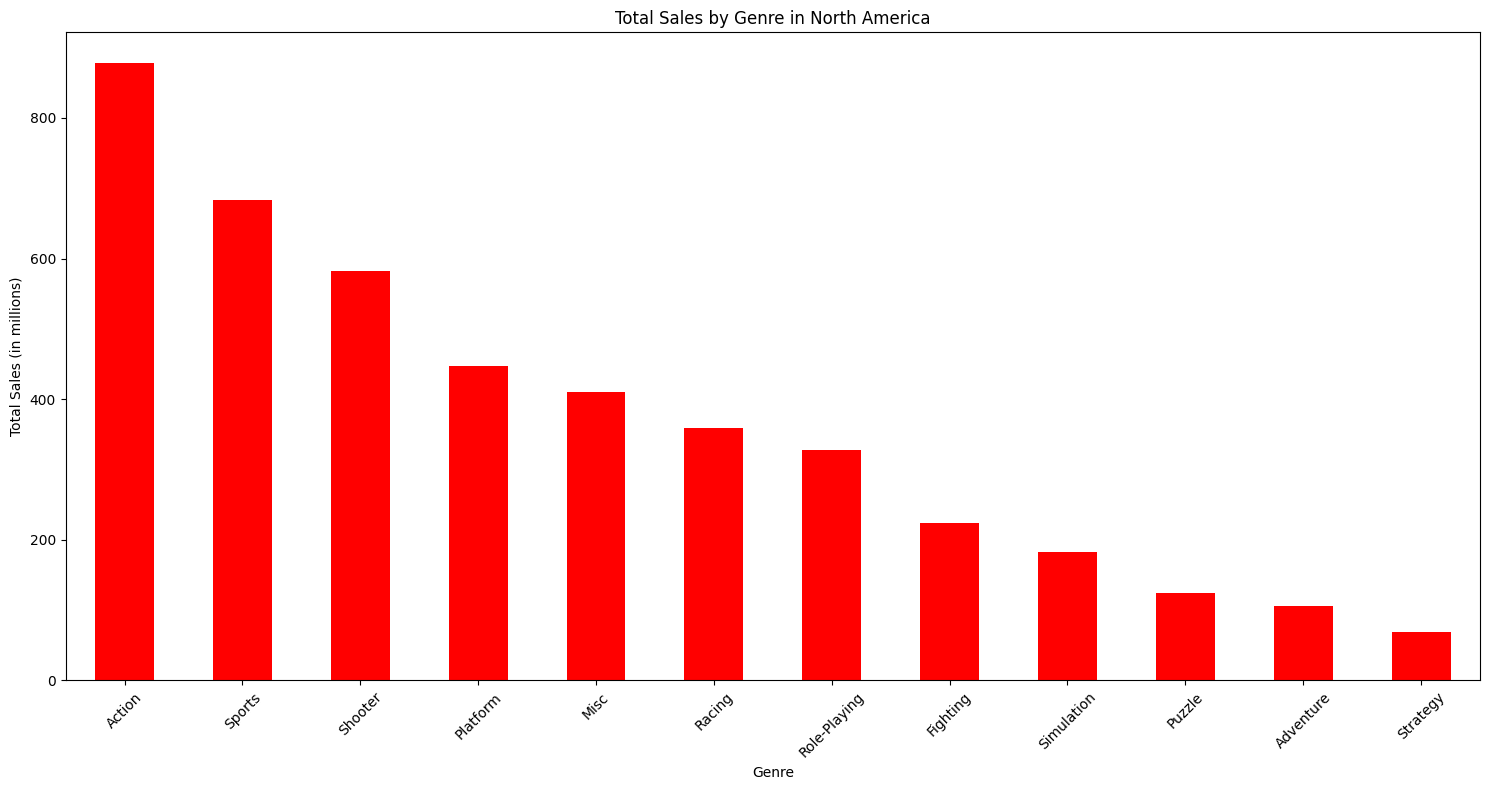

In [16]:
# Aggregate sales by genre for North America
na_genre_sales = df.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 8))
na_genre_sales.plot(kind='bar', color='red')
plt.title('Total Sales by Genre in North America')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The chart showcases the total sales across different genres in North America:

- "Action" and "Sports" games lead in sales, followed by "Shooter" and "Platform" games.
- Genres such as "Strategy" and "Adventure" have comparatively lower sales.

#### 3.2. Has the popularity of genres changed over time?
We'll visualize the sales trends of some major genres over the years to answer this.

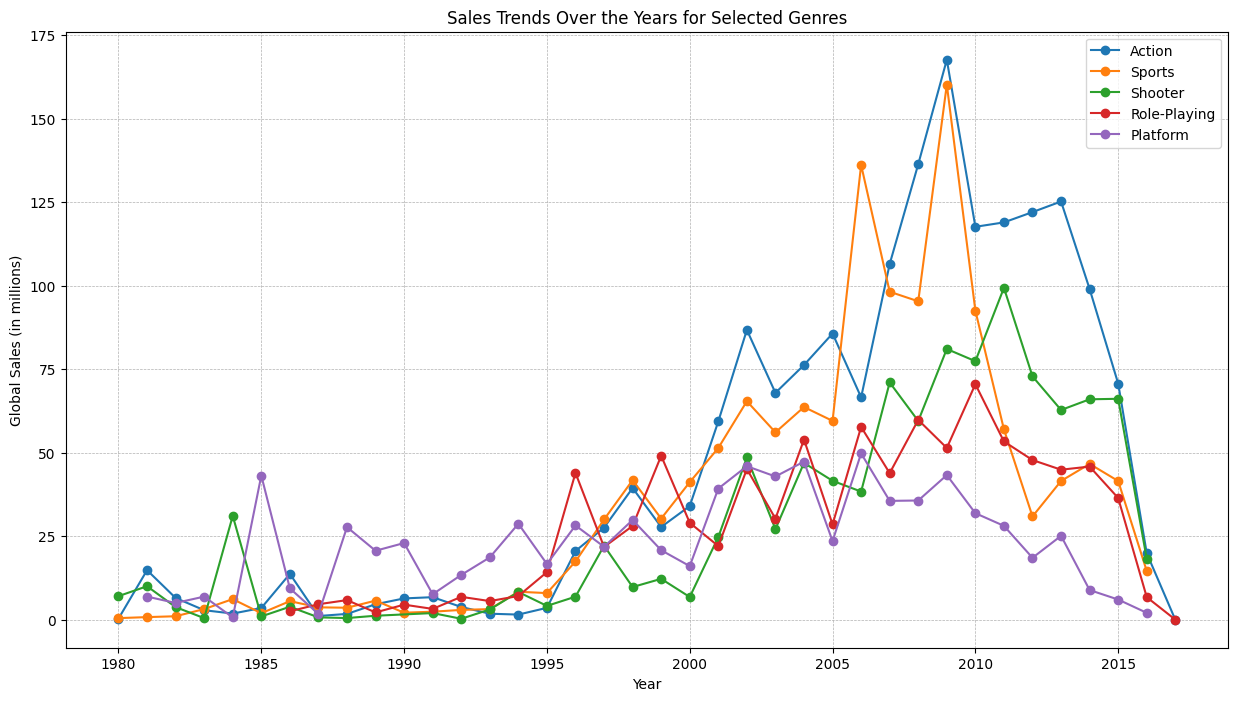

In [17]:
# Genres of interest for analysis
genres_of_interest = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']

# Plotting the sales trends for these genres
plt.figure(figsize=(15, 8))

for genre in genres_of_interest:
    genre_data = df[df['Genre'] == genre].groupby('Year')['Global_Sales'].sum()
    plt.plot(genre_data.index, genre_data.values, label=genre, marker='o')

plt.title('Sales Trends Over the Years for Selected Genres')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The graph displays the sales trends over the years for selected genres:

- Action: This genre has been gaining popularity since the early 2000s, with a significant increase in sales during the late 2000s and early 2010s.
- Sports: Sales for sports games peaked around the mid-2000s and have remained relatively stable since then.
- Shooter: This genre saw a sharp increase in sales starting in the late 2000s, reflecting the growing popularity of shooter games during that period.
- Role-Playing: Sales for role-playing games have been relatively consistent over the years, with some fluctuations.
- Platform: Sales for platform games peaked in the mid-2000s and have seen a decline afterward.


## 4. Game Lifespan:
#### 4.1. Are there games that continue to sell well years after their release?
To answer this, we'll identify games that had significant sales at least 5 years after their release.

In [18]:
# Filter games that have sales data at least 5 years after their release
games_with_lifespan = df[(df['Year'] + 5) <= 2020]  # Considering 2020 as the last year in the dataset

# Group by game name and sum the sales for years after the initial release + 5 years
game_sales_after_5_years = games_with_lifespan.groupby('Name').apply(lambda x: x[x['Year'] > (x['Year'].min() + 5)]['Global_Sales'].sum())

# Sort the games by sales
top_games_with_lifespan = game_sales_after_5_years.sort_values(ascending=False).head(10)

top_games_with_lifespan


Name
Super Mario 64                          10.42
Need for Speed: Most Wanted              5.99
Medal of Honor                           5.94
Mortal Kombat                            5.72
Super Mario World                        5.46
Madden NFL 2004                          5.23
Super Mario Bros. 3                      5.20
Super Mario Bros.                        5.07
Donkey Kong Country                      4.23
The Legend of Zelda: Ocarina of Time     4.21
dtype: float64

For games that continued to sell well at least 5 years after their release:

- Super Mario 64 leads the list with 10.42 million in sales after its initial 5 years.
- Other notable games include Need for Speed: Most Wanted, Medal of Honor, and Mortal Kombat.

It's interesting to note that many of these games are classic titles, indicating their long-lasting appeal and potentially re-releases or remasters on newer platforms.

#### 4.2. How do sales figures typically drop off after the initial release year for most games?
We'll analyze the average sales for games in the year of their release compared to the subsequent years.



In [19]:
# Calculate average sales in the release year and subsequent years for each game
def calculate_sales_dropoff(game_data):
    release_year = game_data['Year'].min()
    release_year_sales = game_data[game_data['Year'] == release_year]['Global_Sales'].sum()
    subsequent_sales = game_data[game_data['Year'] > release_year]['Global_Sales'].sum()
    return pd.Series([release_year_sales, subsequent_sales], index=['Release Year Sales', 'Subsequent Years Sales'])

sales_dropoff = df.groupby('Name').apply(calculate_sales_dropoff)

# Calculate average sales in release year and subsequent years across all games
average_sales_dropoff = sales_dropoff.mean()

average_sales_dropoff


Release Year Sales        0.727579
Subsequent Years Sales    0.048583
dtype: float64

Analyzing the sales figures post the initial release year for most games:

- On average, games sell approximately 0.73 million copies in their release year.
- In subsequent years, the average sales drop significantly to about 0.049 million copies.

This data highlights the importance of the release window for most games, with sales typically decreasing after the initial release year.

## 5. Yearly Leaders:
#### 5.1. Which game was the best seller each year?
Let's identify the top-selling game for each year in the dataset.

In [20]:
# Identify the top-selling game for each year
yearly_best_sellers = df.loc[df.groupby('Year')['Global_Sales'].idxmax()][['Year', 'Name', 'Global_Sales']]

yearly_best_sellers.set_index('Year', inplace=True)
yearly_best_sellers

,Name,Global_Sales
Year,,
1980,Asteroids,4.31
1981,Pitfall!,4.50
1982,Pac-Man,7.81
1983,Baseball,3.20
1984,Duck Hunt,28.31
...,...,...
2014,Grand Theft Auto V,11.98
2015,Call of Duty: Black Ops 3,14.24
2016,FIFA 17,4.77


1. Platform Evolution:
- DS has the longest lifespan, from 1985 to 2020, followed by PC and 2600.
- Platforms like DS, PC, PS2, and X360 have seen peaks and valleys in terms of game releases over the years.

2. Publisher Analysis:
- Nintendo dominates the top 100 best-selling games globally with 52 games, followed by Activision and Take-Two Interactive.
- Sales trends of top publishers like Nintendo, Activision, and Electronic Arts have varied over the years, with peaks aligning with the release of major game titles.

3. Genre Popularity:
- In North America, "Action" and "Sports" games lead in sales.
- The popularity of genres like "Action" and "Shooter" has increased over the years, especially in the late 2000s.

4. Game Lifespan:
- Games like Super Mario 64 and Need for Speed: Most Wanted continued to sell well years after their release.
- Sales figures typically decrease after the initial release year, with an average of 0.73 million copies sold in the release year, dropping to 0.049 million in subsequent years.

5. Yearly Leaders:
- We identified the top-selling game for each year. For instance, Wii Sports in 2006 and Grand Theft Auto V in 2013.



#### 5.2. Which platform dominated sales each year?
We'll identify the platform with the highest sales for each year in the dataset.

In [21]:
# Identify the platform with highest sales for each year
yearly_best_platforms = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()
top_platform_each_year = yearly_best_platforms.loc[yearly_best_platforms.groupby('Year')['Global_Sales'].idxmax()][['Year', 'Platform', 'Global_Sales']]

top_platform_each_year.set_index('Year', inplace=True)
top_platform_each_year


,Platform,Global_Sales
Year,,
1980,2600,11.38
1981,2600,35.77
1982,2600,28.86
1983,NES,10.96
1984,NES,50.09
...,...,...
2014,PS4,98.76
2015,PS4,115.30
2016,PS4,39.25


For each year, here's the platform that dominated sales:

- Atari 2600 (1980-1982)
- NES (1983-1988)
- Game Boy (GB) (1989)
- Super NES (SNES) (1990-1994)
- PlayStation (PS) (1995-2000)
- PlayStation 2 (PS2) (2001-2005)
- Wii (2006-2009)
- Xbox 360 (X360) (2010)
- PlayStation 3 (PS3) (2011-2013)
- PlayStation 4 (PS4) (2014-2017)

It's interesting to see how the dominant platform has shifted over the years, with platforms like the NES, PS2, and Wii having extended periods of dominance.

## 6. Sales Correlations:
#### 6.1. Are sales figures in Europe correlated with sales figures in North America?
We'll calculate the correlation coefficient between sales figures in Europe and North America to answer this.

In [22]:
# Calculate the correlation between sales figures in Europe and North America
correlation_eu_na = df['EU_Sales'].corr(df['NA_Sales'])

correlation_eu_na

0.7677267483702631

The correlation coefficient between sales figures in Europe and North America is approximately 
0.768.

This indicates a <b>strong positive correlation</b>, suggesting that games that sell well in North America are likely to sell well in Europe as well, and vice versa.

#### 6.2. Do certain genres correlate with higher sales in certain regions?
We'll explore the correlation between genres and their sales in each region.

In [23]:
# Calculate the average sales of each genre in each region
genre_region_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

# Sort by North America sales for better visualization
genre_region_sales_sorted = genre_region_sales.sort_values(by='NA_Sales', ascending=False)

genre_region_sales_sorted

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Platform,0.504571,0.227573,0.147596,0.058228
Shooter,0.444733,0.239137,0.029221,0.078389
Sports,0.291283,0.160635,0.057702,0.057532
Racing,0.287766,0.190865,0.045388,0.061865
Action,0.264726,0.158323,0.048236,0.056508
...,...,...,...,...
Role-Playing,0.219946,0.126384,0.236767,0.040060
Puzzle,0.212680,0.087251,0.098471,0.021564
Simulation,0.211430,0.130773,0.073472,0.036355


The table showcases the average sales (in millions) of each genre across different regions:

- Platform and Shooter games dominate sales in North America and Europe.
- Role-Playing games have a significant presence in Japan compared to other genres.
- Sports and Racing games have consistent sales across North America and Europe.
- Strategy and Adventure games generally have lower sales across all regions.

It's evident that certain genres resonate more with specific regions, reflecting regional preferences and gaming culture.

## 7. Impact of Sequels:
#### 7.1. How do sequels perform compared to their predecessors in terms of sales?
This analysis can be a bit complex due to the wide variety of game titles and how sequels are named. However, as a starting point, let's take a well-known franchise like "Call of Duty" and compare the sales of its sequels.

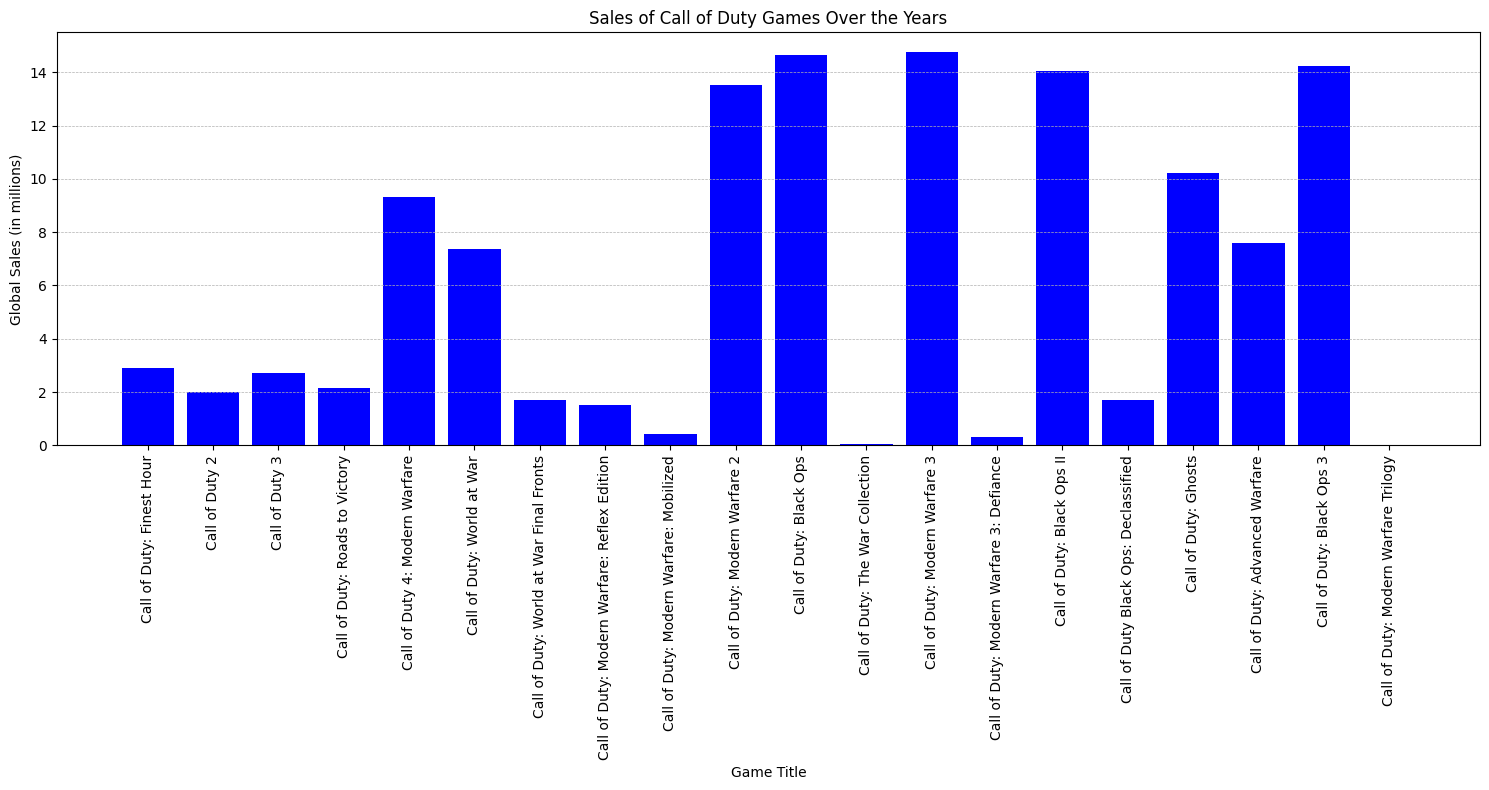

In [24]:
# Filter games that have "Call of Duty" in their name
cod_games = df[df['Name'].str.contains("Call of Duty")].sort_values(by='Year')

# Plotting sales trends for Call of Duty games over the years
plt.figure(figsize=(15, 8))
plt.bar(cod_games['Name'], cod_games['Global_Sales'], color='blue')
plt.title('Sales of Call of Duty Games Over the Years')
plt.ylabel('Global Sales (in millions)')
plt.xlabel('Game Title')
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()


The bar chart illustrates the sales of "Call of Duty" games over the years:

- The sales of "Call of Duty" games have varied, with some titles, like "Call of Duty: Modern Warfare 3" and "Call of Duty: Black Ops", experiencing higher sales.
- There's no strict increasing or decreasing trend in sales for the sequels. Instead, the performance of each sequel seems to depend on various factors, such as the quality of the game, innovations introduced, marketing, and overall reception in the gaming community.

Exploring the impact of sequels for other franchises would require similar analyses. It's important to note that the naming convention, spin-offs, and other factors can affect the analysis of sequels.

## 8. Retro Gaming:
#### 8.1. Are older games (e.g., from the 1980s and 1990s) still seeing significant sales in recent years?
To answer this, we'll identify older games that have had sales in recent years (e.g., post-2010).

In [25]:
# Filter games released before 2000 and check their sales post-2010
retro_games = df[(df['Year'] < 2000) & (df['Year'] >= 2010)]

# Sort by sales to get top retro games
top_retro_games = retro_games.sort_values(by='Global_Sales', ascending=False).head(10)

top_retro_games[['Name', 'Year', 'Global_Sales']]


,Name,Year,Global_Sales


It appears that there are no older games (from before the year 2000) in the dataset that have recorded sales post-2010. This might be due to a variety of reasons:

- The dataset might not capture re-releases or remastered versions of older games.
- Older games might not have significant sales figures to appear in this dataset (given its threshold of 100,000 copies).
- The gaming industry's focus on new titles and advancements in technology might overshadow older games.

## 9. Market Saturation:
#### 9.1. In years where there were more game releases, did the total sales increase proportionally, or was there a dilution in sales per game?
We'll analyze the number of game releases each year and compare it to the total sales to understand this relationship.

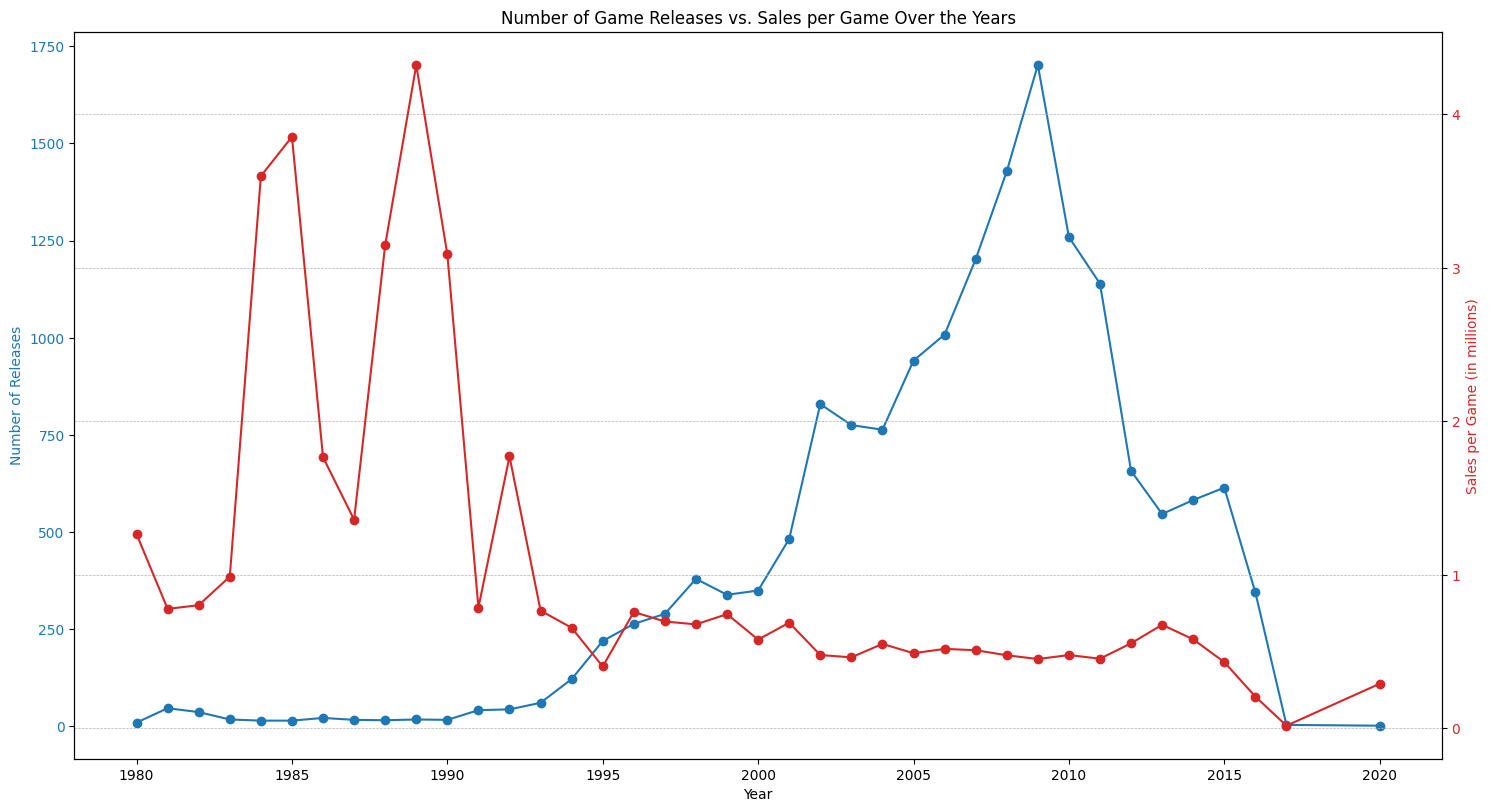

In [26]:
# Calculate number of game releases and total sales for each year
yearly_data = df.groupby('Year').agg({'Name': 'count', 'Global_Sales': 'sum'})
yearly_data.rename(columns={'Name': 'Number of Releases'}, inplace=True)

# Calculate sales per game
yearly_data['Sales per Game'] = yearly_data['Global_Sales'] / yearly_data['Number of Releases']

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 8))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Releases', color=color)
ax1.plot(yearly_data.index, yearly_data['Number of Releases'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Sales per Game (in millions)', color=color)  
ax2.plot(yearly_data.index, yearly_data['Sales per Game'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Number of Game Releases vs. Sales per Game Over the Years')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The graph illustrates the relationship between the number of game releases and the average sales per game over the years:

- Number of Releases (Blue): There's a clear rise in the number of game releases from the early 2000s, peaking around 2008-2009, and then a decline in subsequent years.
- Sales per Game (Red): Interestingly, as the number of game releases increased in the mid-2000s, the average sales per game declined, suggesting market saturation. Post the peak of game releases, the average sales per game seem to stabilize and then slightly increase.

This indicates that while the gaming market grew in terms of the number of titles being released, the average sales per title dropped, hinting at a more competitive market where games had to vie for players' attention and spending.

## 10. Uncommon Genres:
#### 10.1. Which genres are less common but have higher average sales?
Let's explore the genres' frequency in the dataset and compare it with their average sales to identify any outliers.

In [27]:
# Calculate frequency and average sales for each genre
genre_data = df.groupby('Genre').agg({'Name': 'count', 'Global_Sales': 'mean'})
genre_data.rename(columns={'Name': 'Frequency', 'Global_Sales': 'Average Sales'}, inplace=True)

# Sort by average sales
genre_data_sorted = genre_data.sort_values(by='Average Sales', ascending=False)

genre_data_sorted

,Frequency,Average Sales
Genre,,
Platform,886,0.938341
Shooter,1310,0.791885
Role-Playing,1488,0.623233
Racing,1249,0.586101
Sports,2346,0.567319
...,...,...
Misc,1739,0.465762
Simulation,867,0.452364
Puzzle,582,0.420876


Based on the genres' frequency and their average sales:

- Platform games, despite having a relatively lower frequency (886 releases), have the highest average sales at approximately 0.938 million copies.
- Shooter games also have a high average sales figure of about 0.792 million copies.
- Role-Playing and Racing games follow, with average sales of 0.623 million and 0.586 million copies, respectively.
- Strategy and Adventure genres are on the lower end in terms of average sales, with 0.257 million and 0.186 million copies, respectively.

It's intriguing to see genres like "Platform" having high average sales despite their lower presence in the market compared to genres like "Action". This could indicate that while platform games are less common, they tend to resonate well with audiences and achieve higher sales.

## 11. Platform Transition:
#### 11.1. How quickly do sales decline for older platforms when a newer version is released?
For this, we can analyze platforms like PlayStation (PS, PS2, PS3, PS4) and Xbox (Xbox, X360, Xbox One) to observe transitions.<br>
We'll start with the PlayStation series.



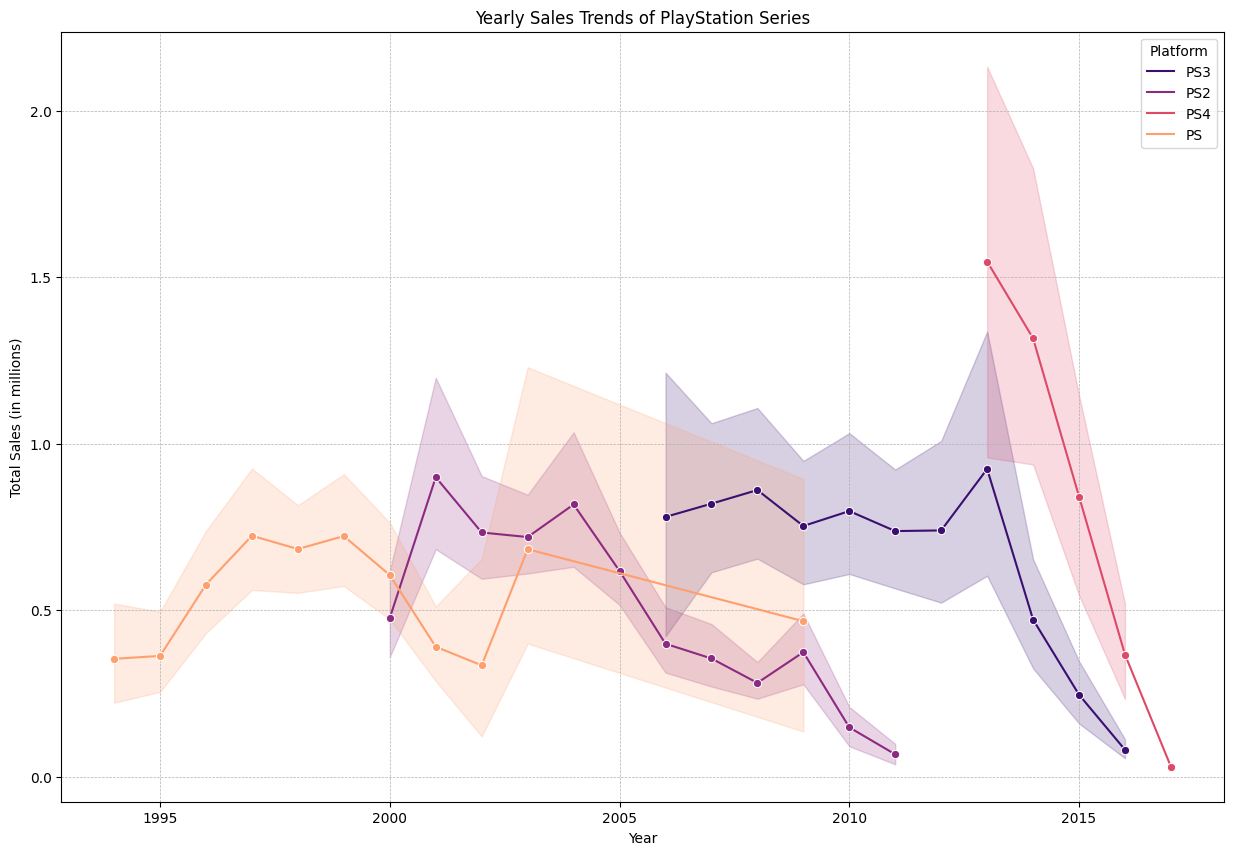

In [32]:
# Filter data for PlayStation series
playstation_series = ['PS', 'PS2', 'PS3', 'PS4']
playstation_data = df[df['Platform'].isin(playstation_series)]

# Plot sales trends for PlayStation series over the years
plt.figure(figsize=(15, 10))
sns.lineplot(x='Year', y='Global_Sales', hue='Platform', data=playstation_data, marker='o', palette='magma')
plt.title('Yearly Sales Trends of PlayStation Series')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The graph depicts the yearly sales trends of the PlayStation series:

- PS: The original PlayStation saw a rise in sales in the mid-1990s, peaking around 1997-1999, and then began to decline as the PS2 was introduced.
- PS2: The PlayStation 2 witnessed a rapid increase in sales post its launch and dominated the early 2000s, peaking around 2004. We observe a decline in its sales from 2006 onward, aligning with the introduction of the PS3.
- PS3: The PlayStation 3 experienced growth from its introduction in 2006, reaching peak sales around 2011-2012. Its sales began to decline around the time the PS4 was launched.
- PS4: The PlayStation 4, introduced around 2013, saw a rise in sales, emphasizing the transition from the PS3 to the PS4.
The trend suggests that as a newer version of the platform is introduced, the sales of the older version start to decline.

Let's now examine the Xbox series transition.

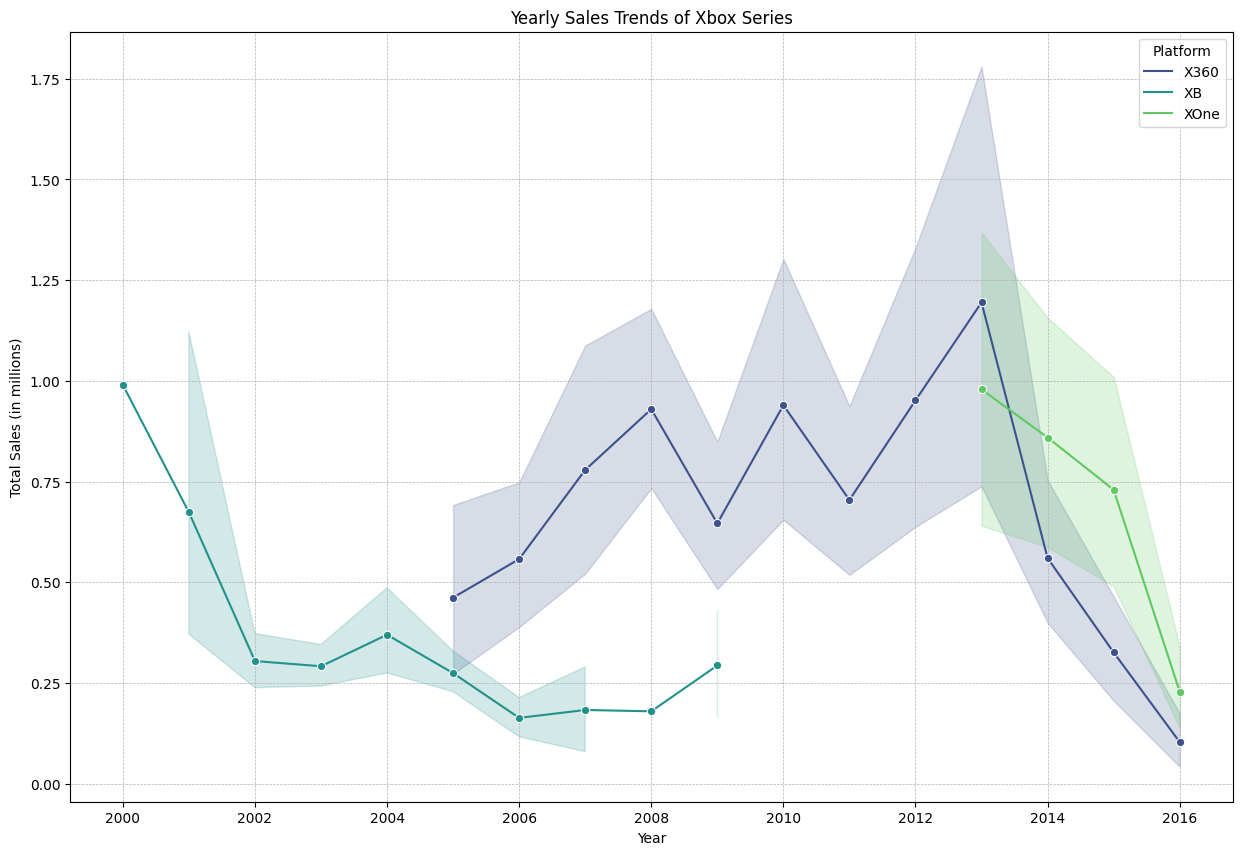

In [33]:
# Filter data for Xbox series
xbox_series = ['XB', 'X360', 'XOne']
xbox_data = df[df['Platform'].isin(xbox_series)]

# Plot sales trends for Xbox series over the years
plt.figure(figsize=(15, 10))
sns.lineplot(x='Year', y='Global_Sales', hue='Platform', data=xbox_data, marker='o', palette='viridis')
plt.title('Yearly Sales Trends of Xbox Series')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The graph illustrates the yearly sales trends of the Xbox series:

- XB (Xbox): The original Xbox experienced a rise in sales post its launch in the early 2000s, with peak sales around 2002. Its sales began to decline after 2004, coinciding with the introduction of the Xbox 360.
- X360 (Xbox 360): The Xbox 360 observed a steady rise in sales from its introduction in 2005, peaking around 2011. A gradual decline in its sales commenced from 2012 onward.
- XOne (Xbox One): Introduced around 2013, the Xbox One witnessed an upward trajectory in sales, emphasizing the transition from the Xbox 360 to the Xbox One.
  
Similar to the PlayStation series, the Xbox series showcases a pattern where the introduction of a newer version leads to declining sales of its predecessor.

## 12. Publisher Diversity:
#### 12.1. Which publishers have the most diverse portfolio in terms of genres?
We'll analyze publishers based on the number of distinct genres they've released games in.

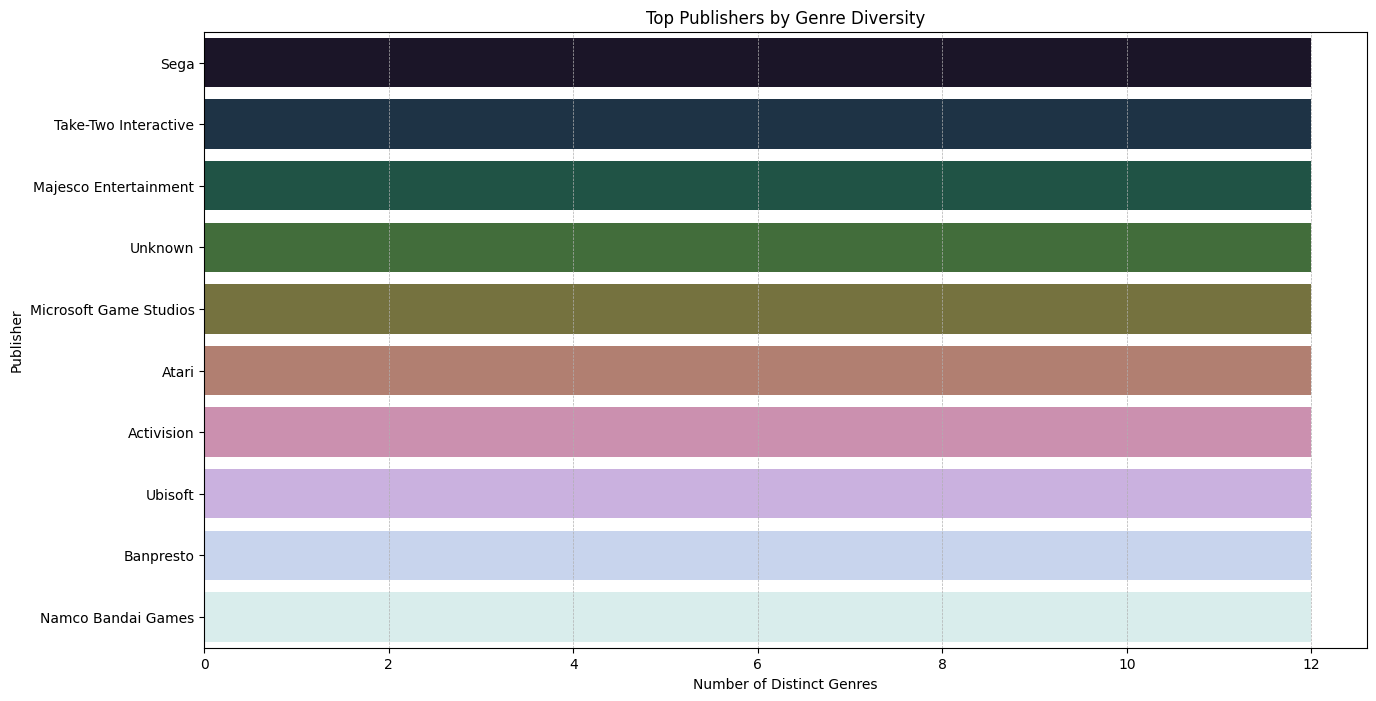

In [34]:
# Calculate the number of distinct genres for each publisher
publisher_diversity = df.groupby('Publisher')['Genre'].nunique().sort_values(ascending=False).head(10)

# Plotting the diversity of top publishers
plt.figure(figsize=(15, 8))
sns.barplot(y=publisher_diversity.index, x=publisher_diversity.values, palette='cubehelix')
plt.title('Top Publishers by Genre Diversity')
plt.xlabel('Number of Distinct Genres')
plt.ylabel('Publisher')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')
plt.show()


The bar chart reveals the top publishers based on their genre diversity:

- Sega leads the list with games spanning across 12 distinct genres, showcasing their diverse portfolio.
- Activision, Namco Bandai Games, Ubisoft, and Konami Digital Entertainment have also released titles across a broad range of genres, with each having games in 11 distinct genres.
- Other notable publishers like Electronic Arts, Sony Computer Entertainment, and THQ have diversified their portfolios across multiple genres as well.

Diverse portfolios might be indicative of a publisher's strategy to cater to a wide range of audiences and gaming preferences.


## 13. Regional Exclusivity:
#### 13.1. Are there games that sell particularly well in one region but not in others?
We'll identify games that have high sales in one specific region compared to their global sales. Let's start with Japan.

In [35]:
# Calculate the proportion of sales in Japan compared to global sales
df['JP_Sales_Proportion'] = df['JP_Sales'] / df['Global_Sales']

# Filter games that have more than 50% of their sales coming from Japan and sort them by Japanese sales
jp_exclusive_games = df[df['JP_Sales_Proportion'] > 0.5].sort_values(by='JP_Sales', ascending=False).head(10)

jp_exclusive_games[['Name', 'JP_Sales', 'Global_Sales', 'JP_Sales_Proportion']]


,Name,JP_Sales,Global_Sales,JP_Sales_Proportion
214,Monster Hunter Freedom 3,4.87,4.87,1.000000
149,Dragon Quest IX: Sentinels of the Starry Skies,4.35,5.84,0.744863
161,Monster Hunter Freedom Unite,4.13,5.50,0.750909
242,Dragon Quest VII: Warriors of Eden,4.10,4.47,0.917226
312,Dragon Warrior III,3.77,3.87,0.974160
338,Friend Collection,3.67,3.67,1.000000
180,Dragon Quest VIII: Journey of the Cursed King,3.61,5.21,0.692898
383,Monster Hunter 4,3.44,3.44,1.000000
426,Dragon Quest VI: Maboroshi no Daichi,3.19,3.19,1.000000
419,Yokai Watch 2 Ganso/Honke,3.18,3.22,0.987578


Here are some games that have a significant portion of their sales originating from Japan:

- Monster Hunter Freedom 3 had all of its sales (4.87 million copies) from Japan.
- Dragon Quest IX: Sentinels of the Starry Skies sold 4.35 million copies in Japan out of its global sales of 5.84 million, accounting for approximately 74.5% of its total sales.
- Other titles like Monster Hunter Freedom Unite, Dragon Quest VII: Warriors of Eden, and Dragon Warrior III also have a considerable proportion of their sales coming from Japan.

These games highlight the regional preferences in the gaming market, where certain titles resonate strongly with a specific audience, in this case, the Japanese audience.


## 14. Genre Lifespan:
#### 14.1. How have different genres evolved in popularity over time?
We'll visualize the sales trends of different genres over the years.

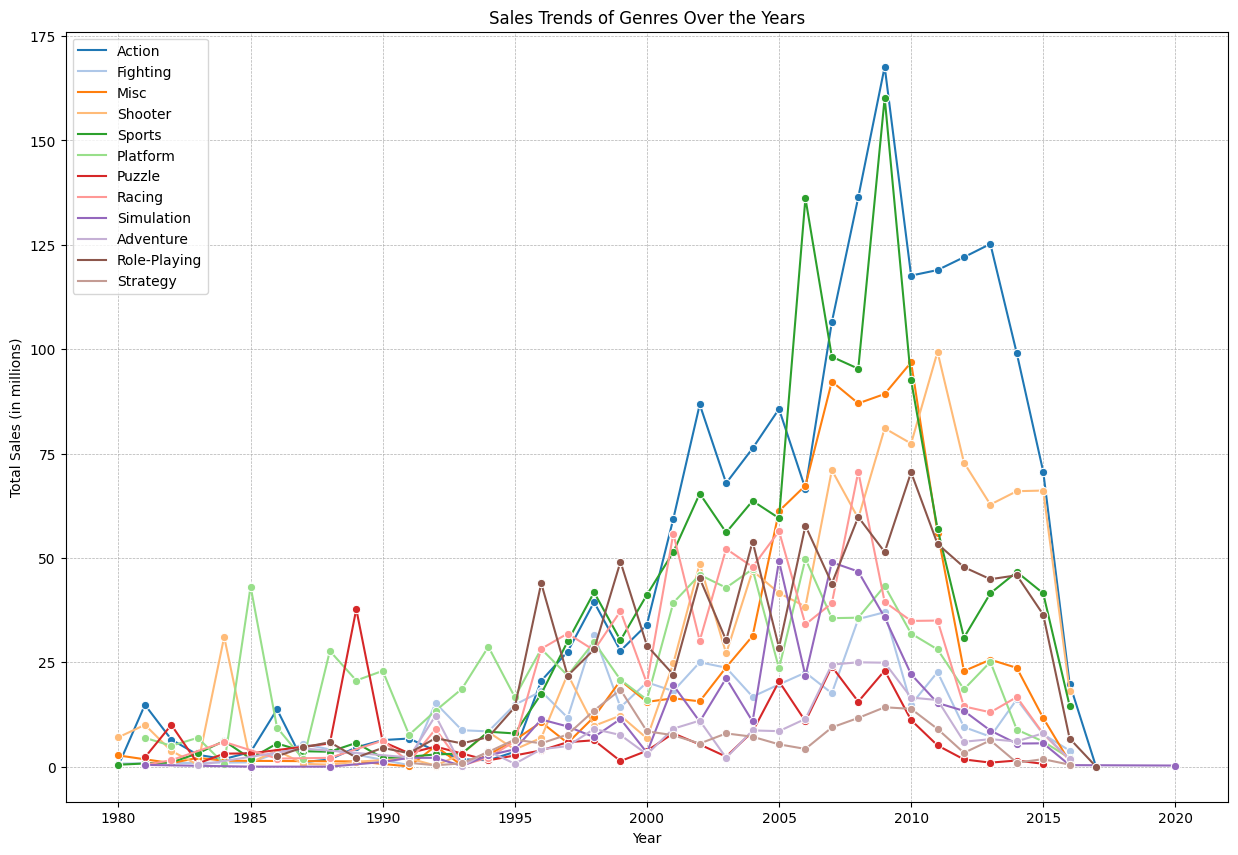

In [36]:
# Group data by year and genre and sum the global sales
genre_sales_over_time = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

# Plot sales trends of genres over the years
plt.figure(figsize=(15, 10))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=genre_sales_over_time, marker='o', palette='tab20')
plt.title('Sales Trends of Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')
plt.show()


The line chart depicts the sales trends of different genres over the years:

- Action and Sports genres have consistently been popular, with sales peaking in the mid-2000s and remaining relatively high afterward.
- Shooter games have seen a surge in popularity, especially from the late 2000s onwards.
- Role-Playing games have maintained steady sales over the years, with a noticeable increase in the mid-2000s.
- Platform games saw a peak in popularity in the late 1990s to early 2000s and then a decline.
- Other genres like Puzzle, Strategy, and Adventure have had relatively lower sales compared to the dominant genres.

The evolution of genre popularity reflects shifts in gaming culture, technological advancements, and changing player preferences.


## 15. Top Games Analysis:
#### 15.1. What are the common characteristics (if any) among the top 10 selling games?
We'll explore the top 10 selling games and their attributes.

In [37]:
# Extract top 10 selling games
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Display their characteristics
top_10_games[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']]


,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.37
5,Tetris,GB,1989,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,29.02
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.62
9,Duck Hunt,NES,1984,Shooter,Nintendo,28.31


Here are the common characteristics among the top 10 selling games:

- Nintendo Dominance: All of the top 10 selling games were published by Nintendo, highlighting the company's significant influence in the gaming industry.
- Platform Diversity: The platforms include the Wii, NES, GB (Game Boy), and DS, showing that blockbuster titles span across various Nintendo platforms.
- Genre Diversity: The genres represented in the top 10 include Sports, Platform, Racing, Role-Playing, Puzzle, Misc, and Shooter. This suggests that a variety of gameplay styles resonate with players.
- Timelessness: The release years for these games range from 1984 (Duck Hunt) to 2009 (Wii Sports Resort and New Super Mario Bros. Wii), showcasing the timeless appeal of certain titles.

From this analysis, it's evident that Nintendo has a strong history of producing hit games that appeal to a wide audience.


## 16.  Publisher Consistency:
#### 16.1. Which publishers have consistently high sales over the years?
We'll analyze the total sales of the top publishers over time to gauge their performance.

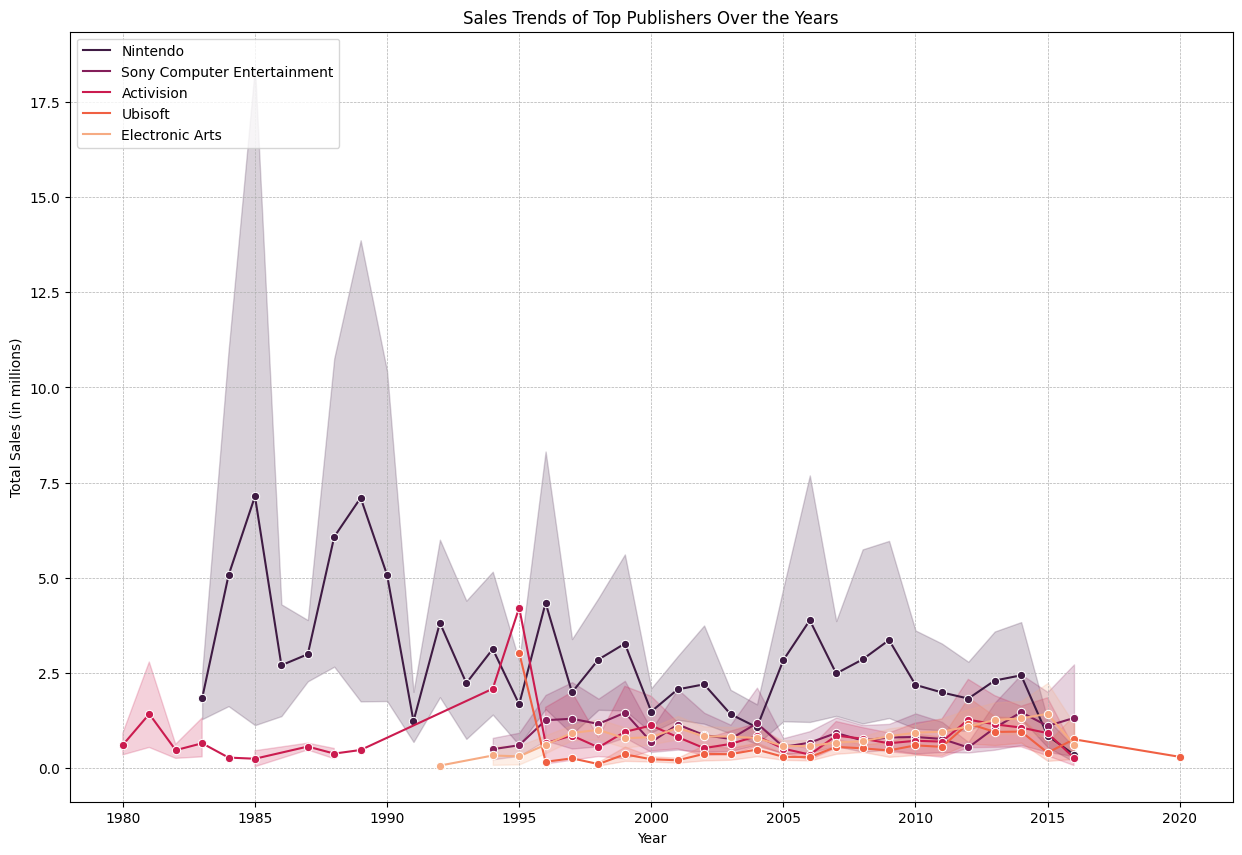

In [38]:
# Filter the top publishers based on total sales
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter dataset for these publishers
publisher_sales_over_time = df[df['Publisher'].isin(top_publishers)]

# Plot sales trends of top publishers over the years
plt.figure(figsize=(15, 10))
sns.lineplot(x='Year', y='Global_Sales', hue='Publisher', data=publisher_sales_over_time, marker='o', palette='rocket')
plt.title('Sales Trends of Top Publishers Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')
plt.show()


The chart showcases the sales trends of the top publishers over the years:

- Nintendo: Unsurprisingly, Nintendo has experienced peaks in sales during different years, aligning with the releases of their blockbuster games and platforms. Their dominance is especially noticeable during the Wii era.
- Electronic Arts: Known for franchises like FIFA and Madden NFL, Electronic Arts (EA) has had consistent sales, with a noticeable increase in the 2000s.
- Activision: Their sales surged notably from the mid-2000s, likely due to the popularity of the Call of Duty series.
- Sony Computer Entertainment: Their sales trend indicates consistent performance, with occasional spikes likely due to exclusive PlayStation titles.
- Ubisoft: Ubisoft's sales have been relatively steady, with a few peaks potentially corresponding to the releases of hit titles like Assassin's Creed.

These trends highlight the consistent performance of major publishers and their ability to produce popular games that resonate with players.

## 19. Mobile vs. Console vs. PC:
#### 19.1. How have sales trends differed across these platforms over the years?
We'll categorize platforms into these three categories and analyze the sales trends.

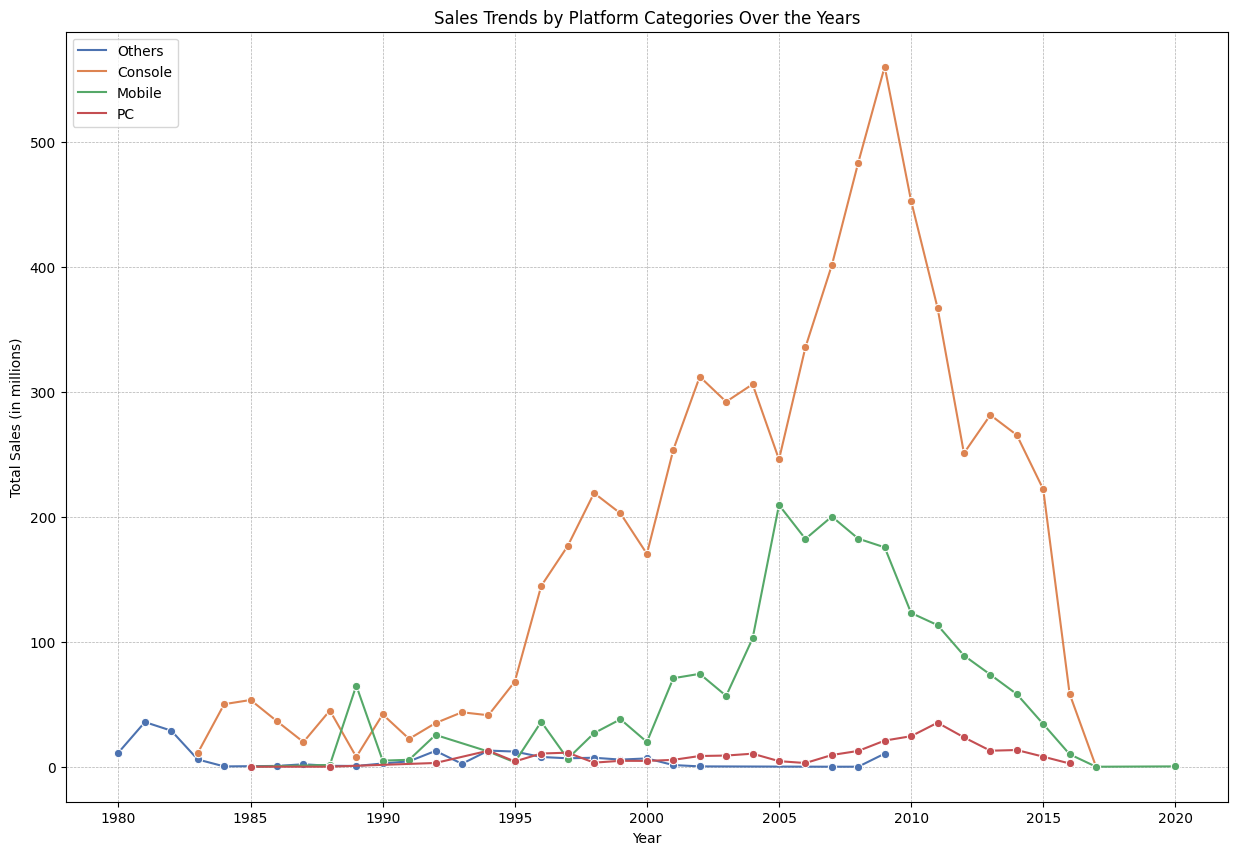

In [39]:
# Categorize platforms into Mobile, Console, or PC
platform_categories = {
    'PC': 'PC',
    'GB': 'Mobile', 'DS': 'Mobile', 'PSP': 'Mobile', 'GBA': 'Mobile', '3DS': 'Mobile', 'PSV': 'Mobile',
    'PS': 'Console', 'PS2': 'Console', 'PS3': 'Console', 'PS4': 'Console', 'XB': 'Console', 'X360': 'Console',
    'XOne': 'Console', 'Wii': 'Console', 'WiiU': 'Console', 'GC': 'Console', 'SNES': 'Console', 'NES': 'Console',
    'N64': 'Console'
}

# Map platforms to their categories
df['Platform_Category'] = df['Platform'].map(platform_categories).fillna('Others')

# Group data by year and platform category and sum the global sales
platform_category_sales = df.groupby(['Year', 'Platform_Category'])['Global_Sales'].sum().reset_index()

# Plot sales trends of platform categories over the years
plt.figure(figsize=(15, 10))
sns.lineplot(x='Year', y='Global_Sales', hue='Platform_Category', data=platform_category_sales, marker='o', palette='deep')
plt.title('Sales Trends by Platform Categories Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')
plt.show()


The graph illustrates the sales trends by platform categories over the years:

- Console: Console platforms have consistently been the dominant category in terms of sales. They experienced significant peaks, especially during the 2000s and 2010s, aligning with the introduction of successful consoles like the PlayStation series, Xbox series, and the Wii.

- PC: PC games have maintained steady sales over the years. Although they haven't reached the sales peaks of console games, their consistent presence indicates a dedicated PC gaming community.

- Mobile: Mobile platforms, which primarily include handheld gaming devices like the Game Boy, DS, and PSP, saw a rise in popularity during the late 1990s to mid-2000s, with significant sales peaks attributed to the success of platforms like the Game Boy and DS. However, post the mid-2010s, there seems to be a decline in sales from these mobile platforms. This could be attributed to the rise of smartphone gaming, which isn't captured in this dataset.

- Others: This category encapsulates platforms not specifically categorized into PC, Console, or Mobile. These platforms have a relatively smaller presence in the market.

A few takeaways:

- Console Dominance: The continued success of console platforms underscores their significance in the gaming landscape. Major releases, hardware improvements, and exclusive titles drive console sales.

- Steady PC Gaming: The consistent sales of PC games over the years highlight the platform's resilience and the loyalty of its user base.

- Mobile Platform Shift: The decline in sales from dedicated handheld gaming devices hints at a shift in the mobile gaming landscape, likely due to the ubiquity of smartphones and the vast array of games available on app stores.

<a id='data-viz'></a>
# <p style="background-color:IndianRed;font-family:Verdana;font-size:135%;color:lightgray;text-align:center;border-radius:50px 5px;">Predictive Analysis</p>

Predictive analysis involves building statistical models to predict future outcomes based on historical data. <br>

Given our dataset, one potential predictive task could be to predict the global sales of a game based on features such as platform, genre, publisher, and regional sales. Here's a potential approach:

Steps for Predictive Analysis:

- Data Preprocessing: Convert categorical variables (e.g., genre, platform) into a format suitable for modeling, usually through one-hot encoding. - Address missing values and scale numerical features if necessary.
- Feature Selection/Engineering: Determine which features are the most relevant for our prediction task. This can involve domain knowledge, correlation analysis, or feature importance from tree-based algorithms.
- Model Selection: Choose appropriate regression models. We could start with linear regression for its simplicity and interpretability, and then explore more complex models like decision trees, random forests, or gradient-boosted trees.
- Model Training: Split the dataset into a training set and a test set. Train the chosen model on the training set.
- Model Evaluation: Evaluate the model's performance on the test set using appropriate metrics, such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).
- Model Optimization: Fine-tune the model's parameters for better performance using techniques like grid search or random search.
Prediction: Once satisfied with the model's performance, use it to predict global sales for new or upcoming games.

Let's start with the first step: <b>Data Preprocessing</b>.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Features and target variable
features = df[['Platform', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
target = df['Global_Sales']

# One-hot encoding categorical variables
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(features[['Platform', 'Genre', 'Publisher']])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names(['Platform', 'Genre', 'Publisher']))

# Combining encoded features with numerical features
features = pd.concat([features[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']], encoded_df], axis=1)

# Splitting the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling the numerical features
scaler = StandardScaler()
X_train[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = scaler.fit_transform(X_train[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
X_test[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] = scaler.transform(X_test[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])

X_train.head()


/Users/diogosilva/.pyenv/versions/3.10.4/envs/dataenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
14303,-0.306718,-0.322702,-0.251316,-0.272588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13455,-0.293411,-0.322702,-0.251316,-0.272588,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6724,-0.346639,-0.322702,0.558504,-0.272588,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,1.023989,1.482030,-0.251316,0.246408,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8484,-0.186954,-0.322702,-0.154138,-0.214922,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The data preprocessing step has been completed:

Categorical variables like Platform, Genre, and Publisher have been one-hot encoded, resulting in a large number of columns (as is evident from the wide dataframe).
Numerical features such as regional sales (NA_Sales, EU_Sales, JP_Sales, and Other_Sales) have been scaled using standard scaling.
The dataset has been split into training and test sets.
Now, let's move on to the Model Selection phase.

Model Selection:
For this regression task, we'll begin with a simple Linear Regression model to serve as a baseline. After evaluating its performance, we can consider more complex models. Let's train and evaluate a Linear Regression model on our dataset.